#**PROJECT OVERVIEW**
---
This project aims to analyze patterns in machine downtime, as well as to create a model which is able to predict whether or not a machine would be down based on certain variables. The dataset that would be used can be found below:

https://drive.google.com/file/d/18_cF7sI2SKmofzA5yxrLqOdvuCm1L4wf/view?usp=sharing

note: in order to make it easier to extract, it is decided that the data would be placed inside github

#**Importing Libraries**
---

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, RFECV, RFE
from sklearn.inspection import permutation_importance

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

#**Data Loading**
---
The columns found on this dataset are as follows:
1. **Date** - the date when a machine is observed
2. **Machine_ID** - unique ID given to each machine.
3. **Assembly_Line_No** - the assembly line number that a machine belonged to.
4. **Hydraulic_Pressure(bar)** - pressure in the machine’s hydraulic system, measured in bars.
5. **Coolant_Pressure(bar)** - pressure of the coolant fluid used to regulate machine temperature.
6. **Air_System_Pressure(bar)** - pressure within the pneumatic (air) system of the machine.
7. **Coolant_Temperature** - temperature of the coolant fluid during operation (°C).
8. **Hydraulic_Oil_Temperature(?C)** - temperature of the hydraulic oil used in the machine (°C).
9. **Spindle_Bearing_Temperature(?C)** - temperature of the spindle bearing, indicating heat buildup or friction (°C).
10. **Spindle_Vibration(?m)** - vibration level of the spindle, measured in micrometers (µm).
11. **Tool_Vibration(?m)** - vibration level of the cutting tool, measured in micrometers (µm).
12. **Spindle_Speed(RPM)** - rotational speed of the spindle, measured in revolutions per minute.
13. **Voltage(volts)** - electrical voltage supplied to the machine (V).
14. **Torque(Nm)** - rotational force or torque generated by the spindle (Newton-meters).
15. **Cutting(kN)** - cutting force exerted during machining operations (kilonewtons).
16. **Downtime** - whether or not a machine experienced a failure (noted by Machine_Failure or No_Machine_Failure)

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/comradeftj/Datsets/refs/heads/main/Machine_Downtime_DA.csv')
df.head()

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(?C),Spindle_Bearing_Temperature(?C),Spindle_Vibration(?m),Tool_Vibration(?m),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,31-12-2021,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,31-05-2022,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,31-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure


#**Exploratory Data Analysis**
---

##**1. Data Type Information**
---

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Date                             2500 non-null   object 
 1   Machine_ID                       2500 non-null   object 
 2   Assembly_Line_No                 2500 non-null   object 
 3   Hydraulic_Pressure(bar)          2490 non-null   float64
 4   Coolant_Pressure(bar)            2481 non-null   float64
 5   Air_System_Pressure(bar)         2483 non-null   float64
 6   Coolant_Temperature              2488 non-null   float64
 7   Hydraulic_Oil_Temperature(?C)    2484 non-null   float64
 8   Spindle_Bearing_Temperature(?C)  2493 non-null   float64
 9   Spindle_Vibration(?m)            2489 non-null   float64
 10  Tool_Vibration(?m)               2489 non-null   float64
 11  Spindle_Speed(RPM)               2494 non-null   float64
 12  Voltage(volts)      

##**2. Descriptive Statistics**
---

In [4]:
df.describe(include='all')

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(?C),Spindle_Bearing_Temperature(?C),Spindle_Vibration(?m),Tool_Vibration(?m),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
count,2500,2500,2500,2490.000000,2481.000000,2483.000000,2488.000000,2484.000000,2493.000000,2489.000000,2489.000000,2494.000000,2494.000000,2479.000000,2493.000000,2500
unique,164,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,15-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Machine_Failure
freq,64,874,874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1265
mean,NaN,NaN,NaN,101.409084,4.947058,6.499275,18.559887,47.618317,35.063698,1.009334,25.411975,20274.792302,348.996792,25.234968,2.782551,NaN
std,NaN,NaN,NaN,30.289301,0.997357,0.407279,8.554480,3.768674,3.764823,0.342898,6.437142,3852.660056,45.376024,6.138564,0.616688,NaN
min,NaN,NaN,NaN,-14.326454,0.325000,5.063480,4.100000,35.200000,22.600000,-0.461000,2.161000,0.000000,202.000000,0.000000,1.800000,NaN
25%,NaN,NaN,NaN,76.355000,4.462464,6.217987,10.400000,45.100000,32.500000,0.777000,21.089000,17919.000000,319.000000,21.666115,2.250000,NaN
50%,NaN,NaN,NaN,96.763486,4.939960,6.505191,21.200000,47.700000,35.100000,1.008000,25.455000,20137.500000,349.000000,24.647736,2.780000,NaN
75%,NaN,NaN,NaN,126.415727,5.518401,6.780550,25.600000,50.100000,37.600000,1.236000,29.790000,22501.750000,380.000000,30.514008,3.270000,NaN


##**3. Missing Value Detection**
---

In [5]:
df.isnull().sum()

,0
Date,0
Machine_ID,0
Assembly_Line_No,0
Hydraulic_Pressure(bar),10
Coolant_Pressure(bar),19
Air_System_Pressure(bar),17
Coolant_Temperature,12
Hydraulic_Oil_Temperature(?C),16
Spindle_Bearing_Temperature(?C),7
Spindle_Vibration(?m),11


##**4. Duplicate Data Detection**
---

In [6]:
df.duplicated().sum()

np.int64(0)

##**5. Data Distribution**
---

###a. Numerical Data

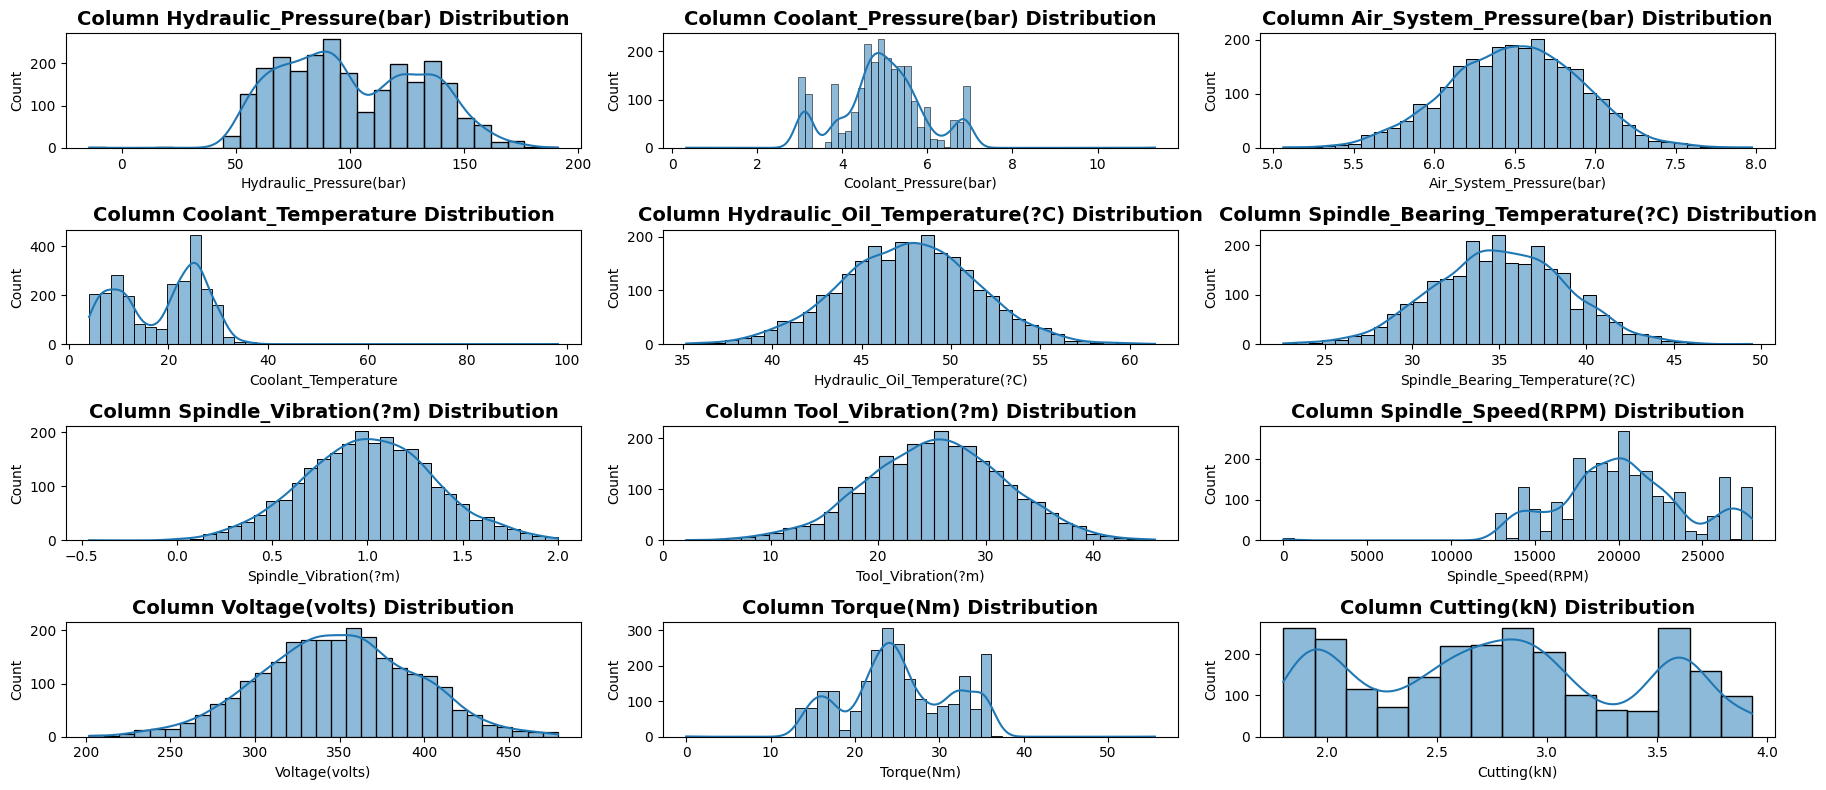

In [7]:
numeric = df.select_dtypes(include='number')

plt.figure(figsize=(18,8))
for i, col in enumerate(numeric.columns):
  plt.subplot(4, 3, i+1)
  sns.histplot(df[col], kde=True)
  plt.title(f'Column {col} Distribution', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

###b. Categorical Data

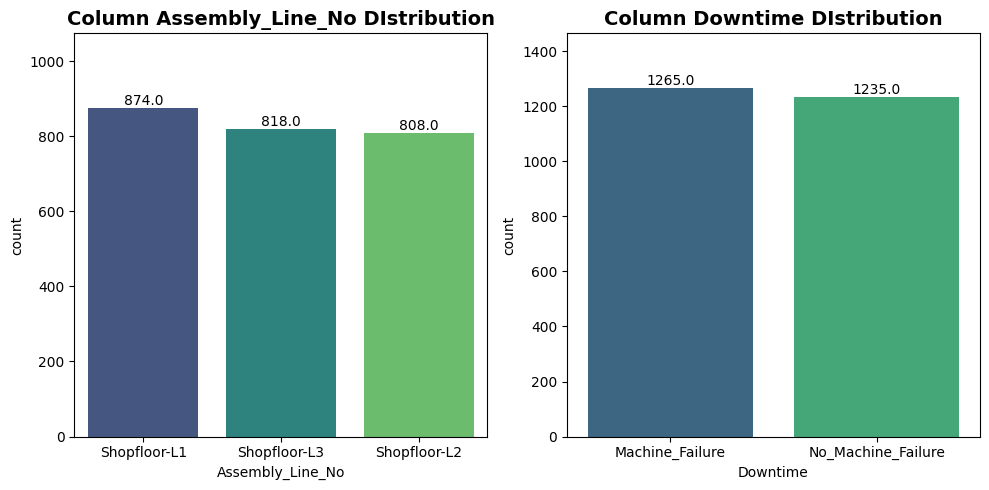

In [8]:
data = ['Assembly_Line_No', 'Downtime']

plt.figure(figsize=(10, 5))
for i, col in enumerate(data):
  plt.subplot(1, 2, i+1)
  counts = df[col].value_counts()
  ax = sns.countplot(x=df[col], hue=df[col], palette='viridis')
  for val in ax.containers:
    label=[v.get_height() for v in val]
    ax.bar_label(val, labels=label, label_type='edge')
  #ax.bar_label(ax.containers[0])
  plt.title(f'Column {col} DIstribution', fontsize=14, fontweight='bold')
  plt.ylim(ymax=counts.max() + 200)
plt.tight_layout()
plt.show()

##**6. Outlier Detection**
---

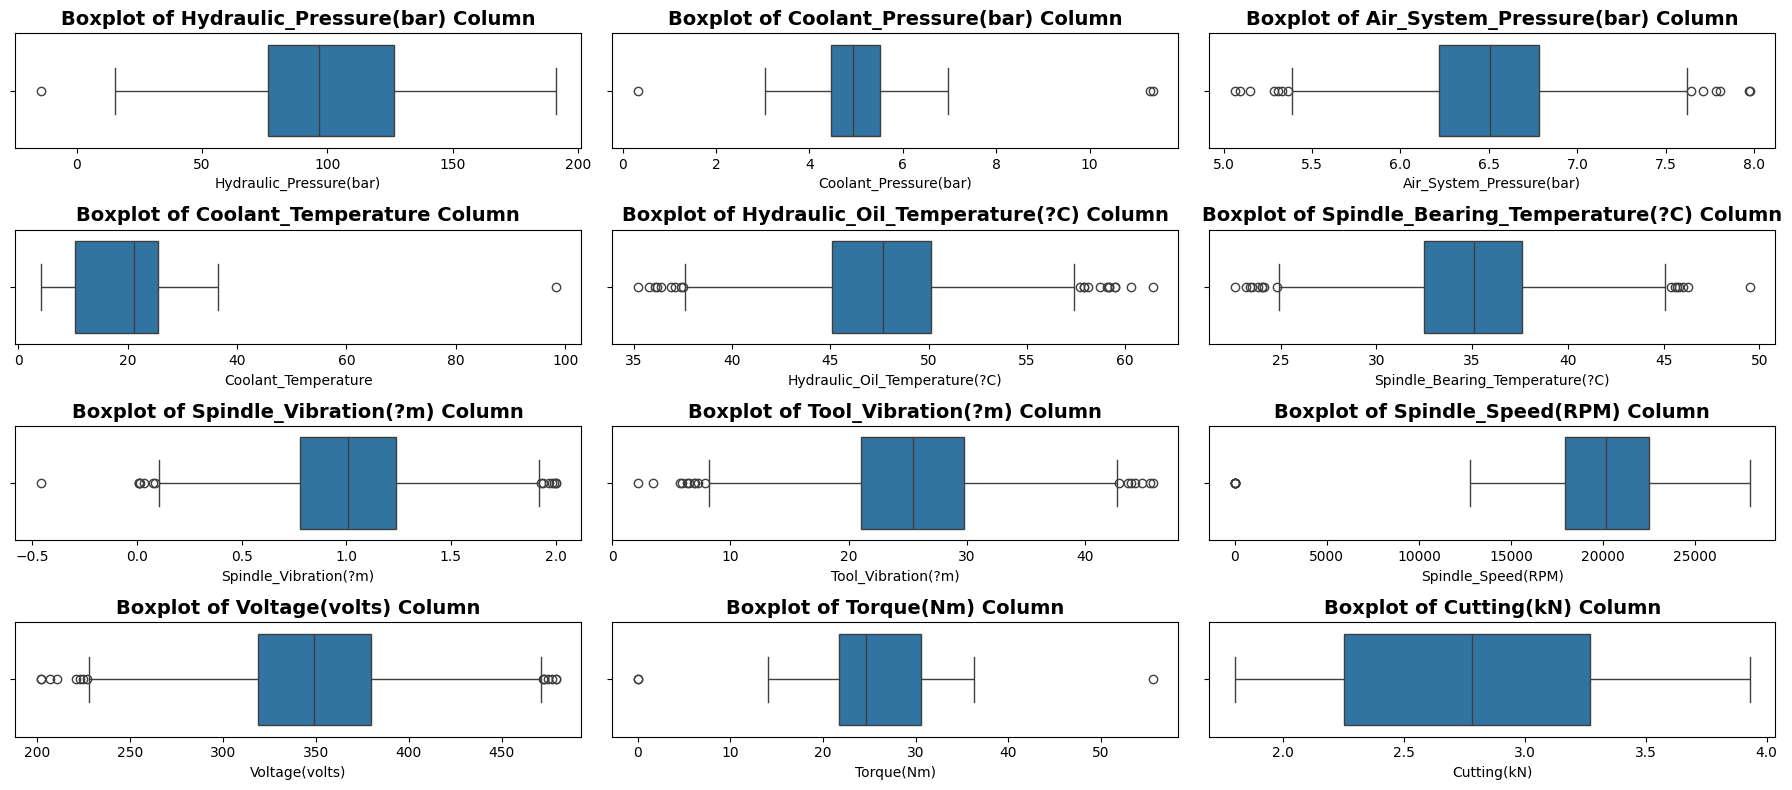

In [9]:
numeric = df.select_dtypes(include='number')

plt.figure(figsize=(18, 8))
for i, col in enumerate(numeric.columns):
  plt.subplot(4, 3, i+1)
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col} Column', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

##**7. Correlation Analysis**
---

In [10]:
#sns.pairplot(df)
#plt.show()

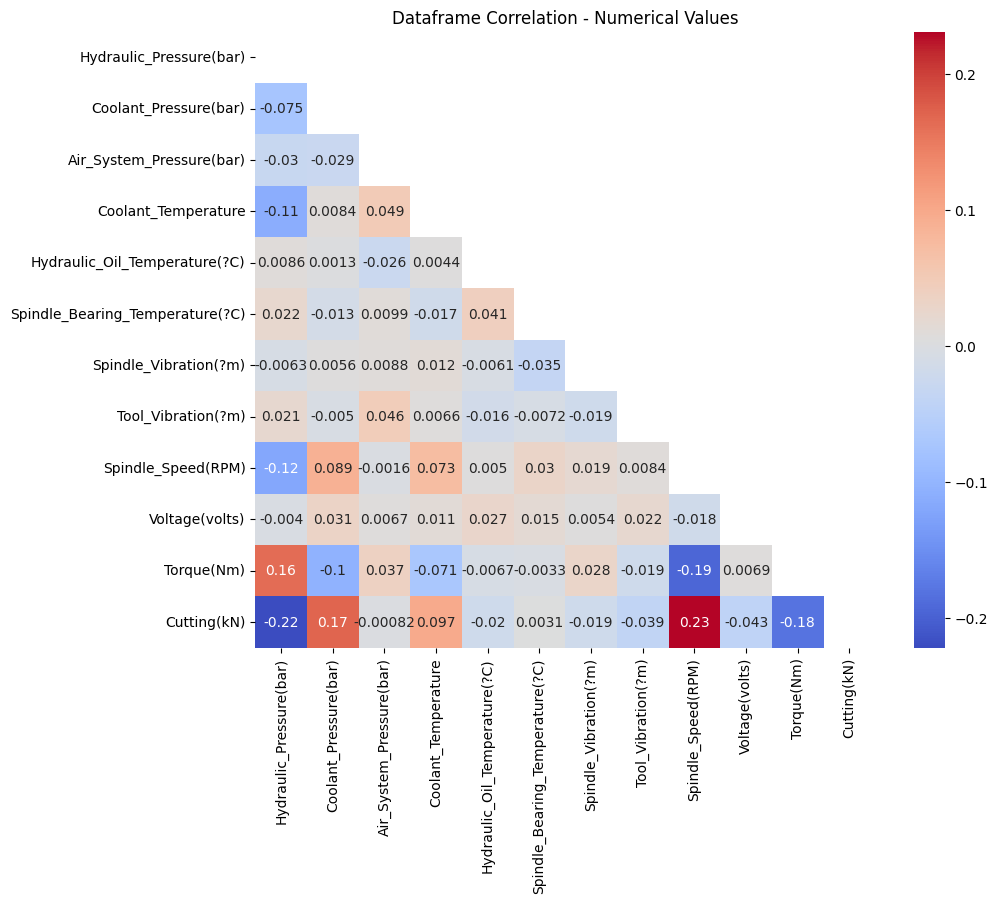

In [11]:
corr = df.select_dtypes(include='number').corr()
mask = np.triu(np.ones_like(corr, dtype=float))

plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm')
plt.title('Dataframe Correlation - Numerical Values')
plt.show()

#**Data Cleaning**
---

##**1. Outlier Handling**
---
The number of outlier is relatively insignificant, and upon further observation, it could be said that whilst far from the rest of the values in this dataset, most of the outliers do hold value and could be classed as genuine observations, except for columns:
1. Hydraulic_Pressure(bar) - observations of pressures under 0
2. Spindle_Vibration(?m) - observations of vibrations less than 0

In [12]:
numeric = df.select_dtypes(include='number')
outlier_idx = []

for col in numeric.columns:
  q3 = df[col].quantile(0.75)
  q1 = df[col].quantile(0.25)
  iqr = q3-q1

  df_outlier = np.where((df[col] < q1 - 1.5 * iqr) | (df[col] > q3 + 1.5 * iqr))[0].tolist()
  if len(df_outlier) > 0:
    outlier_pct = (len(df_outlier)/len(df)) * 100
    outlier_loc = df.loc[df_outlier, :]
    print(f'Percentage of outliers for column {col}: {outlier_pct}%')
    print(f'Number of outliers for column {col}: {len(df_outlier)}')
    display(outlier_loc)
    outlier_idx.extend(df_outlier)
    print(' ')

Percentage of outliers for column Hydraulic_Pressure(bar): 0.04%
Number of outliers for column Hydraulic_Pressure(bar): 1


,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(?C),Spindle_Bearing_Temperature(?C),Spindle_Vibration(?m),Tool_Vibration(?m),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
2058,06-02-2022,Makino-L3-Unit1-2015,Shopfloor-L3,-14.326454,5.067261,6.163999,6.8,49.6,39.2,1.627,17.723,20386.0,348.0,33.923365,2.73,No_Machine_Failure


 
Percentage of outliers for column Coolant_Pressure(bar): 0.12%
Number of outliers for column Coolant_Pressure(bar): 3


,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(?C),Spindle_Bearing_Temperature(?C),Spindle_Vibration(?m),Tool_Vibration(?m),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
851,20-03-2022,Makino-L3-Unit1-2015,Shopfloor-L3,140.916843,11.350,6.315380,5.7,49.3,30.4,1.468,26.444,15217.0,351.0,18.901770,1.87,No_Machine_Failure
853,20-03-2022,Makino-L2-Unit1-2015,Shopfloor-L2,112.341994,11.300,6.563934,34.1,44.2,38.9,1.407,32.362,25156.0,324.0,18.977659,2.01,No_Machine_Failure
913,19-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,74.890000,0.325,6.188361,22.0,50.0,24.1,0.923,31.222,21951.0,326.0,28.152023,2.41,Machine_Failure


 
Percentage of outliers for column Air_System_Pressure(bar): 0.52%
Number of outliers for column Air_System_Pressure(bar): 13


,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(?C),Spindle_Bearing_Temperature(?C),Spindle_Vibration(?m),Tool_Vibration(?m),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
125,29-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,55.150000,4.666802,5.091411,12.3,46.2,36.2,0.276,31.194,17919.0,388.0,17.899311,2.71,Machine_Failure
674,22-03-2022,Makino-L3-Unit1-2015,Shopfloor-L3,88.920000,5.567857,5.063480,6.2,44.4,37.6,1.435,32.596,16874.0,309.0,28.292165,3.49,Machine_Failure
739,21-04-2022,Makino-L1-Unit1-2013,Shopfloor-L1,96.950000,6.560332,7.971607,4.9,51.3,35.5,0.724,24.128,20801.0,340.0,16.449554,3.33,Machine_Failure
800,21-02-2022,Makino-L1-Unit1-2013,Shopfloor-L1,82.850000,4.870609,7.804750,24.4,42.9,29.2,0.989,30.032,19647.0,385.0,24.298977,3.55,Machine_Failure
950,19-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,143.949430,3.895031,5.366875,32.6,46.2,33.3,0.727,29.687,14266.0,313.0,33.923365,1.88,No_Machine_Failure
1135,17-01-2022,Makino-L2-Unit1-2015,Shopfloor-L2,143.440135,5.080215,7.712441,21.1,49.4,26.5,1.118,26.676,20438.0,372.0,30.514008,1.91,No_Machine_Failure
1190,16-02-2022,Makino-L1-Unit1-2013,Shopfloor-L1,77.600000,4.747308,7.973992,30.3,53.7,31.4,1.357,23.315,19158.0,417.0,24.919198,2.54,Machine_Failure
1659,11-02-2022,Makino-L1-Unit1-2013,Shopfloor-L1,134.865176,5.690481,7.781151,26.7,49.8,41.0,0.760,35.040,17726.0,374.0,32.394315,1.88,No_Machine_Failure
1910,07-04-2022,Makino-L1-Unit1-2013,Shopfloor-L1,137.160517,3.126011,5.329777,20.2,53.1,40.3,1.121,31.120,20101.0,374.0,23.750162,1.85,No_Machine_Failure
2101,05-04-2022,Makino-L3-Unit1-2015,Shopfloor-L3,175.100000,4.692049,5.151876,28.7,51.4,29.0,1.536,29.388,23432.0,362.0,17.899311,3.58,Machine_Failure


 
Percentage of outliers for column Coolant_Temperature: 0.04%
Number of outliers for column Coolant_Temperature: 1


,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(?C),Spindle_Bearing_Temperature(?C),Spindle_Vibration(?m),Tool_Vibration(?m),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
1035,18-02-2022,Makino-L2-Unit1-2015,Shopfloor-L2,119.761152,NaN,6.641547,98.2,44.4,30.0,1.303,28.941,19197.0,346.0,30.514008,3.63,No_Machine_Failure


 
Percentage of outliers for column Hydraulic_Oil_Temperature(?C): 0.84%
Number of outliers for column Hydraulic_Oil_Temperature(?C): 21


,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(?C),Spindle_Bearing_Temperature(?C),Spindle_Vibration(?m),Tool_Vibration(?m),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
127,29-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,91.920000,4.632908,6.770093,18.8,37.1,37.6,0.967,26.864,21951.0,358.0,16.449554,3.69,Machine_Failure
337,26-03-2022,Makino-L3-Unit1-2015,Shopfloor-L3,71.490000,4.150410,7.028656,25.4,57.9,35.1,1.319,34.504,21951.0,354.0,28.686576,2.46,Machine_Failure
375,26-01-2022,Makino-L1-Unit1-2013,Shopfloor-L1,79.870000,4.768416,6.564726,24.4,36.4,33.6,0.939,29.835,19251.0,370.0,24.798816,2.48,Machine_Failure
534,24-02-2022,Makino-L3-Unit1-2015,Shopfloor-L3,76.840000,4.807144,6.087880,26.4,59.5,43.5,0.709,24.568,19380.0,363.0,24.633746,2.83,Machine_Failure
588,23-03-2022,Makino-L2-Unit1-2015,Shopfloor-L2,103.203781,5.663439,6.314902,26.4,61.4,41.9,0.916,20.255,22653.0,378.0,31.620335,2.02,No_Machine_Failure
597,23-02-2022,Makino-L2-Unit1-2015,Shopfloor-L2,84.600000,4.754858,6.809208,12.4,37.4,30.3,0.999,20.143,26526.0,280.0,24.888020,3.67,Machine_Failure
614,23-02-2022,Makino-L3-Unit1-2015,Shopfloor-L3,76.430000,6.108823,6.748728,14.2,59.2,36.5,1.321,28.080,27957.0,320.0,24.903599,2.53,Machine_Failure
724,22-02-2022,Makino-L1-Unit1-2013,Shopfloor-L1,131.377070,5.375713,6.379810,23.9,36.9,37.6,0.753,26.670,21580.0,309.0,22.122428,2.91,No_Machine_Failure
825,20-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,55.490000,3.822990,6.019990,24.2,35.2,30.8,1.717,26.188,17919.0,310.0,31.538746,2.17,Machine_Failure
1002,18-03-2022,Makino-L3-Unit1-2015,Shopfloor-L3,119.761152,3.866647,6.398835,6.8,60.3,36.2,1.141,27.403,18436.0,318.0,32.370456,1.99,No_Machine_Failure


 
Percentage of outliers for column Spindle_Bearing_Temperature(?C): 0.64%
Number of outliers for column Spindle_Bearing_Temperature(?C): 16


,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(?C),Spindle_Bearing_Temperature(?C),Spindle_Vibration(?m),Tool_Vibration(?m),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
207,28-02-2022,Makino-L3-Unit1-2015,Shopfloor-L3,157.470000,4.842521,6.214942,16.6,49.5,46.3,0.873,26.210,21951.0,316.0,24.055326,2.93,Machine_Failure
271,27-03-2022,Makino-L3-Unit1-2015,Shopfloor-L3,98.136137,5.754695,5.972926,27.3,44.1,24.8,1.240,31.913,23040.0,361.0,20.720573,3.19,No_Machine_Failure
326,26-04-2022,Makino-L1-Unit1-2013,Shopfloor-L1,55.580000,6.560332,7.025107,26.3,44.1,45.7,1.072,29.714,27613.0,387.0,25.693020,3.69,Machine_Failure
692,22-03-2022,Makino-L3-Unit1-2015,Shopfloor-L3,103.610482,3.053451,6.223366,NaN,50.6,45.4,0.422,34.076,NaN,353.0,NaN,3.09,No_Machine_Failure
749,21-03-2022,Makino-L3-Unit1-2015,Shopfloor-L3,54.110000,4.205222,6.533211,9.5,49.3,23.8,0.782,22.207,26605.0,308.0,28.332463,2.27,Machine_Failure
913,19-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,74.890000,0.325000,6.188361,22.0,50.0,24.1,0.923,31.222,21951.0,326.0,28.152023,2.41,Machine_Failure
1139,16-05-2022,Makino-L3-Unit1-2015,Shopfloor-L3,83.080000,4.580476,6.967770,15.5,54.0,49.5,0.789,32.982,18487.0,358.0,25.823660,3.67,Machine_Failure
1355,14-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,97.740000,4.381427,6.598134,24.4,49.6,23.2,0.822,17.750,26605.0,330.0,27.154428,3.49,Machine_Failure
1693,10-04-2022,Makino-L2-Unit1-2015,Shopfloor-L2,85.736630,5.230446,6.803638,22.5,40.4,22.6,0.818,21.602,16198.0,350.0,22.712879,2.88,No_Machine_Failure
1913,07-04-2022,Makino-L1-Unit1-2013,Shopfloor-L1,98.700000,4.708917,6.554475,16.7,47.0,45.8,0.575,37.669,26605.0,320.0,15.119739,2.49,Machine_Failure


 
Percentage of outliers for column Spindle_Vibration(?m): 0.6%
Number of outliers for column Spindle_Vibration(?m): 15


,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(?C),Spindle_Bearing_Temperature(?C),Spindle_Vibration(?m),Tool_Vibration(?m),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
75,30-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,72.190000,4.631964,7.228819,29.8,43.7,40.2,2.000,30.001,18677.0,303.0,15.119739,3.91,Machine_Failure
99,30-01-2022,Makino-L3-Unit1-2015,Shopfloor-L3,117.122660,3.895031,6.506133,4.5,45.6,31.6,0.010,27.377,16198.0,313.0,22.808370,1.91,No_Machine_Failure
222,28-02-2022,Makino-L2-Unit1-2015,Shopfloor-L2,122.028791,5.537401,5.799850,8.7,51.1,35.9,-0.461,16.647,19197.0,349.0,21.533694,2.85,No_Machine_Failure
351,26-02-2022,Makino-L2-Unit1-2015,Shopfloor-L2,82.340000,4.945748,6.829641,24.4,44.3,36.6,1.984,18.042,19891.0,319.0,24.000905,2.72,Machine_Failure
796,21-02-2022,Makino-L3-Unit1-2015,Shopfloor-L3,141.368175,5.918941,6.549037,10.6,43.9,38.0,0.076,22.473,14152.0,403.0,20.259803,3.07,No_Machine_Failure
1217,15-04-2022,Makino-L1-Unit1-2013,Shopfloor-L1,112.155270,5.263304,6.998291,22.8,51.3,37.9,0.010,31.928,21154.0,308.0,32.370456,2.17,No_Machine_Failure
1252,15-03-2022,Makino-L2-Unit1-2015,Shopfloor-L2,83.700000,3.925254,6.428049,30.3,43.8,30.5,0.088,16.012,15512.0,422.0,30.776302,2.38,Machine_Failure
1414,13-04-2022,Makino-L2-Unit1-2015,Shopfloor-L2,99.100000,4.543077,6.291986,11.5,46.5,28.2,1.929,32.384,18316.0,364.0,26.064752,2.60,Machine_Failure
1662,11-01-2022,Makino-L3-Unit1-2015,Shopfloor-L3,161.851281,5.161441,6.301069,4.5,47.7,37.4,1.994,25.405,20764.0,342.0,22.991813,NaN,No_Machine_Failure
1670,10-05-2022,Makino-L1-Unit1-2013,Shopfloor-L1,134.540000,6.560332,6.198635,13.7,49.9,34.0,0.033,20.702,18387.0,404.0,16.964105,3.61,Machine_Failure


 
Percentage of outliers for column Tool_Vibration(?m): 0.6799999999999999%
Number of outliers for column Tool_Vibration(?m): 17


,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(?C),Spindle_Bearing_Temperature(?C),Spindle_Vibration(?m),Tool_Vibration(?m),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
63,30-03-2022,Makino-L3-Unit1-2015,Shopfloor-L3,132.821406,3.126011,6.690248,5.7,44.7,34.6,1.006,43.624,17726.0,272.0,23.833159,2.01,No_Machine_Failure
111,29-04-2022,Makino-L2-Unit1-2015,Shopfloor-L2,92.380000,4.609862,7.005160,16.8,45.4,40.7,1.339,42.901,21951.0,342.0,14.202890,3.61,Machine_Failure
361,26-02-2022,Makino-L3-Unit1-2015,Shopfloor-L3,131.134322,3.888835,6.951270,23.4,NaN,31.4,1.079,2.161,21423.0,320.0,22.284554,2.17,No_Machine_Failure
493,24-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,141.140000,4.113430,6.582796,8.1,41.3,35.5,0.997,43.893,16541.0,366.0,28.861738,2.22,Machine_Failure
845,20-03-2022,Makino-L3-Unit1-2015,Shopfloor-L3,124.470038,6.249545,7.101710,31.3,42.9,37.1,0.964,45.726,24616.0,286.0,19.393971,2.88,No_Machine_Failure
989,18-04-2022,Makino-L3-Unit1-2015,Shopfloor-L3,90.100000,4.508622,6.620184,28.7,51.3,26.6,1.070,6.539,18152.0,274.0,16.449554,3.61,Machine_Failure
1366,14-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,71.130000,3.982074,6.369743,26.4,44.4,32.3,0.528,5.892,21951.0,333.0,30.099111,2.43,Machine_Failure
1427,13-04-2022,Makino-L2-Unit1-2015,Shopfloor-L2,53.440000,4.539137,6.543853,4.1,51.6,35.7,1.119,5.775,20504.0,399.0,26.083265,2.51,Machine_Failure
1504,12-04-2022,Makino-L1-Unit1-2013,Shopfloor-L1,68.480000,4.544957,6.662468,10.5,49.8,36.1,0.860,6.338,22457.0,335.0,26.044845,3.55,Machine_Failure
1533,12-03-2022,Makino-L2-Unit1-2015,Shopfloor-L2,149.143030,5.302592,6.304178,23.2,47.5,33.6,1.170,6.977,14266.0,312.0,22.394315,1.88,No_Machine_Failure


 
Percentage of outliers for column Spindle_Speed(RPM): 0.27999999999999997%
Number of outliers for column Spindle_Speed(RPM): 7


,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(?C),Spindle_Bearing_Temperature(?C),Spindle_Vibration(?m),Tool_Vibration(?m),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
466,24-11-2021,Makino-L3-Unit1-2015,Shopfloor-L3,88.64,6.560332,6.210167,6.1,44.4,36.8,0.815,24.067,0.0,328.0,29.005529,2.26,Machine_Failure
929,19-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,99.81,6.863944,6.462017,29.8,48.3,38.0,1.267,19.736,0.0,409.0,16.449554,3.59,Machine_Failure
938,19-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,52.96,5.918357,7.275132,5.1,53.2,31.9,0.859,31.685,0.0,301.0,22.433250,2.92,Machine_Failure
951,19-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,54.04,4.566854,5.581496,24.2,44.5,33.6,0.957,26.329,0.0,322.0,20.423615,3.13,Machine_Failure
952,19-03-2022,Makino-L3-Unit1-2015,Shopfloor-L3,70.22,5.567857,6.484372,7.8,51.8,34.2,0.963,28.207,0.0,361.0,22.474437,2.94,Machine_Failure
953,19-03-2022,Makino-L3-Unit1-2015,Shopfloor-L3,73.85,6.560332,6.412568,32.8,52.8,33.2,0.891,35.373,0.0,393.0,23.157992,2.94,Machine_Failure
1012,18-03-2022,Makino-L3-Unit1-2015,Shopfloor-L3,84.79,3.598776,7.188335,11.5,50.1,35.3,0.744,23.441,0.0,338.0,25.154223,2.57,Machine_Failure


 
Percentage of outliers for column Voltage(volts): 0.6%
Number of outliers for column Voltage(volts): 15


,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(?C),Spindle_Bearing_Temperature(?C),Spindle_Vibration(?m),Tool_Vibration(?m),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
81,30-03-2022,Makino-L3-Unit1-2015,Shopfloor-L3,95.290000,4.631763,6.465048,24.4,44.9,31.6,0.791,28.124,18676.0,223.0,15.900716,2.53,Machine_Failure
221,28-02-2022,Makino-L3-Unit1-2015,Shopfloor-L3,124.692315,5.447690,6.129839,9.9,42.6,29.8,0.828,27.852,13272.0,227.0,29.869079,3.00,No_Machine_Failure
460,25-01-2022,Makino-L2-Unit1-2015,Shopfloor-L2,105.090135,3.053451,6.455772,22.6,49.6,39.5,1.246,15.139,21057.0,473.0,22.671891,2.97,No_Machine_Failure
491,24-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,134.451964,5.593650,5.696312,25.9,43.4,31.5,1.346,20.061,22405.0,211.0,33.355120,3.17,No_Machine_Failure
511,24-02-2022,Makino-L2-Unit1-2015,Shopfloor-L2,114.459585,3.053149,5.601535,5.7,41.7,32.6,1.036,22.288,21294.0,477.0,34.973004,3.06,No_Machine_Failure
709,22-02-2022,Makino-L1-Unit1-2013,Shopfloor-L1,129.738325,3.053149,5.667466,23.9,50.7,34.0,0.639,26.724,21576.0,221.0,33.355120,3.03,No_Machine_Failure
830,20-03-2022,Makino-L3-Unit1-2015,Shopfloor-L3,81.240000,6.863944,5.456959,21.1,51.3,32.1,0.869,25.332,20504.0,202.0,28.235273,3.59,Machine_Failure
991,18-04-2022,Makino-L1-Unit1-2013,Shopfloor-L1,71.890000,4.842521,5.997110,29.8,45.4,35.7,0.366,24.855,18152.0,202.0,14.447050,3.67,Machine_Failure
1204,16-01-2022,Makino-L2-Unit1-2015,Shopfloor-L2,149.022364,3.053149,5.923010,5.7,NaN,41.8,1.197,24.494,19197.0,475.0,23.369982,2.87,No_Machine_Failure
1399,14-01-2022,Makino-L1-Unit1-2013,Shopfloor-L1,92.855740,5.077498,6.780751,21.1,40.5,33.5,0.843,22.864,20424.0,479.0,34.973004,1.95,No_Machine_Failure


 
Percentage of outliers for column Torque(Nm): 0.12%
Number of outliers for column Torque(Nm): 3


,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(?C),Spindle_Bearing_Temperature(?C),Spindle_Vibration(?m),Tool_Vibration(?m),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
478,24-04-2022,Makino-L1-Unit1-2013,Shopfloor-L1,134.540000,6.893182,6.649668,8.0,48.3,32.9,0.470,36.048,21951.0,334.0,0.0000,3.67,Machine_Failure
879,20-02-2022,Makino-L3-Unit1-2015,Shopfloor-L3,123.132833,5.820914,6.993879,5.7,48.3,31.6,1.422,16.827,23275.0,352.0,55.5524,3.29,No_Machine_Failure
2000,06-04-2022,Makino-L2-Unit1-2015,Shopfloor-L2,72.466020,5.004733,6.985822,10.6,50.1,29.8,0.413,32.541,20112.0,354.0,0.0000,2.02,No_Machine_Failure


In [13]:
outlier_idx = list(set(outlier_idx))
print(f'Number of rows with outliers: {len(outlier_idx)}')
print(f'Percentage of rows with outliers: {(len(outlier_idx) / len(df)) * 100}%')

Number of rows with outliers: 111
Percentage of rows with outliers: 4.44%


###Deleting extreme values
---
On columns:
1. Hydraulic_Pressure(bar) - observations of pressures under 0
2. Spindle_Vibration(?m) - observations of vibrations less than 0

In [14]:
idx_to_delete = []

idx_hydraulic_ext = df[df['Hydraulic_Pressure(bar)'] < 0].index.tolist()
idx_to_delete.extend(idx_hydraulic_ext)
idx_spindle_ext = df[df['Spindle_Vibration(?m)'] < 0].index.tolist()
idx_to_delete.extend(idx_spindle_ext)

df = df.drop(idx_to_delete)
df = df.reset_index(drop=True)
df.head()

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(?C),Spindle_Bearing_Temperature(?C),Spindle_Vibration(?m),Tool_Vibration(?m),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,31-12-2021,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,31-05-2022,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,31-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure


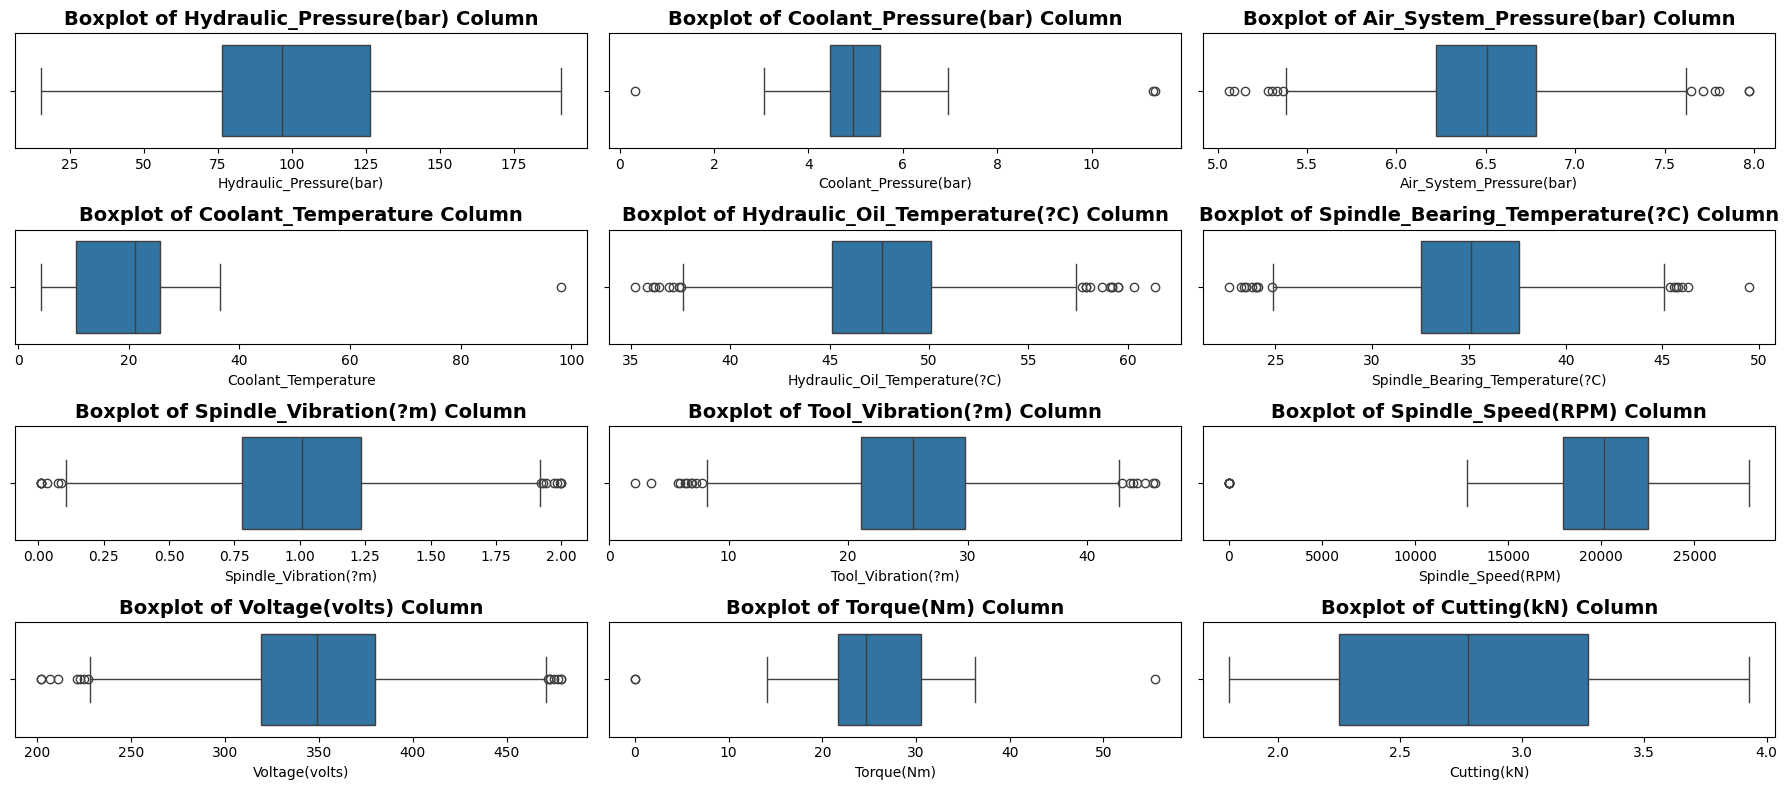

In [15]:
numeric = df.select_dtypes(include='number')

plt.figure(figsize=(18, 8))
for i, col in enumerate(numeric.columns):
  plt.subplot(4, 3, i+1)
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col} Column', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

##**2. Missing Data Handling**
---
Since the missing values are only a small percentage (<6%) of the entire dataset, it is decided that the missing data would be replaced with values of central tendencies for the corresponding column
1. Hydraulic_Pressure(bar) - mean
2. Coolant_Pressure(bar) - mean
3. Air_System_Pressure(bar) - mean
4. Coolant_Temperature - median
5. Hydraulic_Oil_Temperature(?C) - mean
6. Spindle_Bearing_Temperature(?C) - mean
7. Spindle_Vibration(?m) - mean
8. Tool_Vibration(?m) - mean
9. Spindle_Speed(RPM) - mean
10. Voltage(volts) - mean
11. Torque(Nm) - mean
12. Cutting(kN) - mean

In [16]:
df.isnull().sum()

,0
Date,0
Machine_ID,0
Assembly_Line_No,0
Hydraulic_Pressure(bar),10
Coolant_Pressure(bar),19
Air_System_Pressure(bar),17
Coolant_Temperature,12
Hydraulic_Oil_Temperature(?C),16
Spindle_Bearing_Temperature(?C),7
Spindle_Vibration(?m),11


In [17]:
missing_values = df.isnull().sum().sum()
missing_values_pct = (missing_values/len(df)) * 100
print(f'Missing values sum: {missing_values}')
print(f'Percentage of missing values: {missing_values_pct}%')

Missing values sum: 143
Percentage of missing values: 5.724579663730984%


In [18]:
for col in df.columns:
  if df[col].isnull().sum() > 0:
    missing_num = int(df[col].isnull().sum())
    print(f'Percentage of missing value on {col} column: {(missing_num/len(df)) * 100}%')
    df_missing = df[df.isnull().any(axis=1)]
    display(df_missing)
    print(' ')

Percentage of missing value on Hydraulic_Pressure(bar) column: 0.4003202562049639%


,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(?C),Spindle_Bearing_Temperature(?C),Spindle_Vibration(?m),Tool_Vibration(?m),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
128,29-03-2022,Makino-L2-Unit1-2015,Shopfloor-L2,134.981845,5.674679,6.655508,26.5,51.7,35.3,0.908,NaN,22734.0,352.0,20.999472,2.88,No_Machine_Failure
155,28-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,112.430664,5.128736,NaN,21.6,40.5,31.4,1.075,28.592,20624.0,340.0,23.147886,1.89,No_Machine_Failure
213,28-02-2022,Makino-L1-Unit1-2013,Shopfloor-L1,123.492670,5.563162,6.265352,12.2,NaN,40.3,0.415,NaN,14266.0,321.0,21.412002,3.02,No_Machine_Failure
216,28-02-2022,Makino-L1-Unit1-2013,Shopfloor-L1,137.617864,5.544234,NaN,25.5,48.2,35.4,0.767,23.723,14266.0,320.0,32.370456,1.99,No_Machine_Failure
265,27-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,77.200000,4.650913,7.119539,22.6,43.0,35.1,0.839,26.218,18784.0,404.0,NaN,2.57,Machine_Failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2446,01-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,95.714928,3.888835,NaN,4.5,NaN,34.5,0.758,38.343,22032.0,281.0,21.668573,3.16,No_Machine_Failure
2451,01-03-2022,Makino-L2-Unit1-2015,Shopfloor-L2,127.951375,NaN,6.387363,24.6,35.8,34.8,1.774,25.390,21880.0,382.0,31.620335,1.87,No_Machine_Failure
2456,01-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,113.021660,3.888835,6.463824,24.8,49.3,36.5,0.182,NaN,21981.0,360.0,31.521075,1.88,No_Machine_Failure
2459,01-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,NaN,5.425502,6.155373,24.3,50.1,33.8,0.849,27.087,17726.0,351.0,21.975787,1.91,No_Machine_Failure


 
Percentage of missing value on Coolant_Pressure(bar) column: 0.7606084867894315%


,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(?C),Spindle_Bearing_Temperature(?C),Spindle_Vibration(?m),Tool_Vibration(?m),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
128,29-03-2022,Makino-L2-Unit1-2015,Shopfloor-L2,134.981845,5.674679,6.655508,26.5,51.7,35.3,0.908,NaN,22734.0,352.0,20.999472,2.88,No_Machine_Failure
155,28-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,112.430664,5.128736,NaN,21.6,40.5,31.4,1.075,28.592,20624.0,340.0,23.147886,1.89,No_Machine_Failure
213,28-02-2022,Makino-L1-Unit1-2013,Shopfloor-L1,123.492670,5.563162,6.265352,12.2,NaN,40.3,0.415,NaN,14266.0,321.0,21.412002,3.02,No_Machine_Failure
216,28-02-2022,Makino-L1-Unit1-2013,Shopfloor-L1,137.617864,5.544234,NaN,25.5,48.2,35.4,0.767,23.723,14266.0,320.0,32.370456,1.99,No_Machine_Failure
265,27-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,77.200000,4.650913,7.119539,22.6,43.0,35.1,0.839,26.218,18784.0,404.0,NaN,2.57,Machine_Failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2446,01-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,95.714928,3.888835,NaN,4.5,NaN,34.5,0.758,38.343,22032.0,281.0,21.668573,3.16,No_Machine_Failure
2451,01-03-2022,Makino-L2-Unit1-2015,Shopfloor-L2,127.951375,NaN,6.387363,24.6,35.8,34.8,1.774,25.390,21880.0,382.0,31.620335,1.87,No_Machine_Failure
2456,01-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,113.021660,3.888835,6.463824,24.8,49.3,36.5,0.182,NaN,21981.0,360.0,31.521075,1.88,No_Machine_Failure
2459,01-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,NaN,5.425502,6.155373,24.3,50.1,33.8,0.849,27.087,17726.0,351.0,21.975787,1.91,No_Machine_Failure


 
Percentage of missing value on Air_System_Pressure(bar) column: 0.6805444355484388%


,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(?C),Spindle_Bearing_Temperature(?C),Spindle_Vibration(?m),Tool_Vibration(?m),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
128,29-03-2022,Makino-L2-Unit1-2015,Shopfloor-L2,134.981845,5.674679,6.655508,26.5,51.7,35.3,0.908,NaN,22734.0,352.0,20.999472,2.88,No_Machine_Failure
155,28-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,112.430664,5.128736,NaN,21.6,40.5,31.4,1.075,28.592,20624.0,340.0,23.147886,1.89,No_Machine_Failure
213,28-02-2022,Makino-L1-Unit1-2013,Shopfloor-L1,123.492670,5.563162,6.265352,12.2,NaN,40.3,0.415,NaN,14266.0,321.0,21.412002,3.02,No_Machine_Failure
216,28-02-2022,Makino-L1-Unit1-2013,Shopfloor-L1,137.617864,5.544234,NaN,25.5,48.2,35.4,0.767,23.723,14266.0,320.0,32.370456,1.99,No_Machine_Failure
265,27-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,77.200000,4.650913,7.119539,22.6,43.0,35.1,0.839,26.218,18784.0,404.0,NaN,2.57,Machine_Failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2446,01-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,95.714928,3.888835,NaN,4.5,NaN,34.5,0.758,38.343,22032.0,281.0,21.668573,3.16,No_Machine_Failure
2451,01-03-2022,Makino-L2-Unit1-2015,Shopfloor-L2,127.951375,NaN,6.387363,24.6,35.8,34.8,1.774,25.390,21880.0,382.0,31.620335,1.87,No_Machine_Failure
2456,01-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,113.021660,3.888835,6.463824,24.8,49.3,36.5,0.182,NaN,21981.0,360.0,31.521075,1.88,No_Machine_Failure
2459,01-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,NaN,5.425502,6.155373,24.3,50.1,33.8,0.849,27.087,17726.0,351.0,21.975787,1.91,No_Machine_Failure


 
Percentage of missing value on Coolant_Temperature column: 0.4803843074459567%


,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(?C),Spindle_Bearing_Temperature(?C),Spindle_Vibration(?m),Tool_Vibration(?m),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
128,29-03-2022,Makino-L2-Unit1-2015,Shopfloor-L2,134.981845,5.674679,6.655508,26.5,51.7,35.3,0.908,NaN,22734.0,352.0,20.999472,2.88,No_Machine_Failure
155,28-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,112.430664,5.128736,NaN,21.6,40.5,31.4,1.075,28.592,20624.0,340.0,23.147886,1.89,No_Machine_Failure
213,28-02-2022,Makino-L1-Unit1-2013,Shopfloor-L1,123.492670,5.563162,6.265352,12.2,NaN,40.3,0.415,NaN,14266.0,321.0,21.412002,3.02,No_Machine_Failure
216,28-02-2022,Makino-L1-Unit1-2013,Shopfloor-L1,137.617864,5.544234,NaN,25.5,48.2,35.4,0.767,23.723,14266.0,320.0,32.370456,1.99,No_Machine_Failure
265,27-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,77.200000,4.650913,7.119539,22.6,43.0,35.1,0.839,26.218,18784.0,404.0,NaN,2.57,Machine_Failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2446,01-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,95.714928,3.888835,NaN,4.5,NaN,34.5,0.758,38.343,22032.0,281.0,21.668573,3.16,No_Machine_Failure
2451,01-03-2022,Makino-L2-Unit1-2015,Shopfloor-L2,127.951375,NaN,6.387363,24.6,35.8,34.8,1.774,25.390,21880.0,382.0,31.620335,1.87,No_Machine_Failure
2456,01-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,113.021660,3.888835,6.463824,24.8,49.3,36.5,0.182,NaN,21981.0,360.0,31.521075,1.88,No_Machine_Failure
2459,01-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,NaN,5.425502,6.155373,24.3,50.1,33.8,0.849,27.087,17726.0,351.0,21.975787,1.91,No_Machine_Failure


 
Percentage of missing value on Hydraulic_Oil_Temperature(?C) column: 0.6405124099279423%


,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(?C),Spindle_Bearing_Temperature(?C),Spindle_Vibration(?m),Tool_Vibration(?m),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
128,29-03-2022,Makino-L2-Unit1-2015,Shopfloor-L2,134.981845,5.674679,6.655508,26.5,51.7,35.3,0.908,NaN,22734.0,352.0,20.999472,2.88,No_Machine_Failure
155,28-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,112.430664,5.128736,NaN,21.6,40.5,31.4,1.075,28.592,20624.0,340.0,23.147886,1.89,No_Machine_Failure
213,28-02-2022,Makino-L1-Unit1-2013,Shopfloor-L1,123.492670,5.563162,6.265352,12.2,NaN,40.3,0.415,NaN,14266.0,321.0,21.412002,3.02,No_Machine_Failure
216,28-02-2022,Makino-L1-Unit1-2013,Shopfloor-L1,137.617864,5.544234,NaN,25.5,48.2,35.4,0.767,23.723,14266.0,320.0,32.370456,1.99,No_Machine_Failure
265,27-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,77.200000,4.650913,7.119539,22.6,43.0,35.1,0.839,26.218,18784.0,404.0,NaN,2.57,Machine_Failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2446,01-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,95.714928,3.888835,NaN,4.5,NaN,34.5,0.758,38.343,22032.0,281.0,21.668573,3.16,No_Machine_Failure
2451,01-03-2022,Makino-L2-Unit1-2015,Shopfloor-L2,127.951375,NaN,6.387363,24.6,35.8,34.8,1.774,25.390,21880.0,382.0,31.620335,1.87,No_Machine_Failure
2456,01-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,113.021660,3.888835,6.463824,24.8,49.3,36.5,0.182,NaN,21981.0,360.0,31.521075,1.88,No_Machine_Failure
2459,01-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,NaN,5.425502,6.155373,24.3,50.1,33.8,0.849,27.087,17726.0,351.0,21.975787,1.91,No_Machine_Failure


 
Percentage of missing value on Spindle_Bearing_Temperature(?C) column: 0.28022417934347477%


,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(?C),Spindle_Bearing_Temperature(?C),Spindle_Vibration(?m),Tool_Vibration(?m),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
128,29-03-2022,Makino-L2-Unit1-2015,Shopfloor-L2,134.981845,5.674679,6.655508,26.5,51.7,35.3,0.908,NaN,22734.0,352.0,20.999472,2.88,No_Machine_Failure
155,28-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,112.430664,5.128736,NaN,21.6,40.5,31.4,1.075,28.592,20624.0,340.0,23.147886,1.89,No_Machine_Failure
213,28-02-2022,Makino-L1-Unit1-2013,Shopfloor-L1,123.492670,5.563162,6.265352,12.2,NaN,40.3,0.415,NaN,14266.0,321.0,21.412002,3.02,No_Machine_Failure
216,28-02-2022,Makino-L1-Unit1-2013,Shopfloor-L1,137.617864,5.544234,NaN,25.5,48.2,35.4,0.767,23.723,14266.0,320.0,32.370456,1.99,No_Machine_Failure
265,27-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,77.200000,4.650913,7.119539,22.6,43.0,35.1,0.839,26.218,18784.0,404.0,NaN,2.57,Machine_Failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2446,01-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,95.714928,3.888835,NaN,4.5,NaN,34.5,0.758,38.343,22032.0,281.0,21.668573,3.16,No_Machine_Failure
2451,01-03-2022,Makino-L2-Unit1-2015,Shopfloor-L2,127.951375,NaN,6.387363,24.6,35.8,34.8,1.774,25.390,21880.0,382.0,31.620335,1.87,No_Machine_Failure
2456,01-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,113.021660,3.888835,6.463824,24.8,49.3,36.5,0.182,NaN,21981.0,360.0,31.521075,1.88,No_Machine_Failure
2459,01-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,NaN,5.425502,6.155373,24.3,50.1,33.8,0.849,27.087,17726.0,351.0,21.975787,1.91,No_Machine_Failure


 
Percentage of missing value on Spindle_Vibration(?m) column: 0.4403522818254604%


,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(?C),Spindle_Bearing_Temperature(?C),Spindle_Vibration(?m),Tool_Vibration(?m),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
128,29-03-2022,Makino-L2-Unit1-2015,Shopfloor-L2,134.981845,5.674679,6.655508,26.5,51.7,35.3,0.908,NaN,22734.0,352.0,20.999472,2.88,No_Machine_Failure
155,28-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,112.430664,5.128736,NaN,21.6,40.5,31.4,1.075,28.592,20624.0,340.0,23.147886,1.89,No_Machine_Failure
213,28-02-2022,Makino-L1-Unit1-2013,Shopfloor-L1,123.492670,5.563162,6.265352,12.2,NaN,40.3,0.415,NaN,14266.0,321.0,21.412002,3.02,No_Machine_Failure
216,28-02-2022,Makino-L1-Unit1-2013,Shopfloor-L1,137.617864,5.544234,NaN,25.5,48.2,35.4,0.767,23.723,14266.0,320.0,32.370456,1.99,No_Machine_Failure
265,27-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,77.200000,4.650913,7.119539,22.6,43.0,35.1,0.839,26.218,18784.0,404.0,NaN,2.57,Machine_Failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2446,01-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,95.714928,3.888835,NaN,4.5,NaN,34.5,0.758,38.343,22032.0,281.0,21.668573,3.16,No_Machine_Failure
2451,01-03-2022,Makino-L2-Unit1-2015,Shopfloor-L2,127.951375,NaN,6.387363,24.6,35.8,34.8,1.774,25.390,21880.0,382.0,31.620335,1.87,No_Machine_Failure
2456,01-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,113.021660,3.888835,6.463824,24.8,49.3,36.5,0.182,NaN,21981.0,360.0,31.521075,1.88,No_Machine_Failure
2459,01-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,NaN,5.425502,6.155373,24.3,50.1,33.8,0.849,27.087,17726.0,351.0,21.975787,1.91,No_Machine_Failure


 
Percentage of missing value on Tool_Vibration(?m) column: 0.4403522818254604%


,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(?C),Spindle_Bearing_Temperature(?C),Spindle_Vibration(?m),Tool_Vibration(?m),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
128,29-03-2022,Makino-L2-Unit1-2015,Shopfloor-L2,134.981845,5.674679,6.655508,26.5,51.7,35.3,0.908,NaN,22734.0,352.0,20.999472,2.88,No_Machine_Failure
155,28-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,112.430664,5.128736,NaN,21.6,40.5,31.4,1.075,28.592,20624.0,340.0,23.147886,1.89,No_Machine_Failure
213,28-02-2022,Makino-L1-Unit1-2013,Shopfloor-L1,123.492670,5.563162,6.265352,12.2,NaN,40.3,0.415,NaN,14266.0,321.0,21.412002,3.02,No_Machine_Failure
216,28-02-2022,Makino-L1-Unit1-2013,Shopfloor-L1,137.617864,5.544234,NaN,25.5,48.2,35.4,0.767,23.723,14266.0,320.0,32.370456,1.99,No_Machine_Failure
265,27-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,77.200000,4.650913,7.119539,22.6,43.0,35.1,0.839,26.218,18784.0,404.0,NaN,2.57,Machine_Failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2446,01-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,95.714928,3.888835,NaN,4.5,NaN,34.5,0.758,38.343,22032.0,281.0,21.668573,3.16,No_Machine_Failure
2451,01-03-2022,Makino-L2-Unit1-2015,Shopfloor-L2,127.951375,NaN,6.387363,24.6,35.8,34.8,1.774,25.390,21880.0,382.0,31.620335,1.87,No_Machine_Failure
2456,01-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,113.021660,3.888835,6.463824,24.8,49.3,36.5,0.182,NaN,21981.0,360.0,31.521075,1.88,No_Machine_Failure
2459,01-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,NaN,5.425502,6.155373,24.3,50.1,33.8,0.849,27.087,17726.0,351.0,21.975787,1.91,No_Machine_Failure


 
Percentage of missing value on Spindle_Speed(RPM) column: 0.24019215372297836%


,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(?C),Spindle_Bearing_Temperature(?C),Spindle_Vibration(?m),Tool_Vibration(?m),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
128,29-03-2022,Makino-L2-Unit1-2015,Shopfloor-L2,134.981845,5.674679,6.655508,26.5,51.7,35.3,0.908,NaN,22734.0,352.0,20.999472,2.88,No_Machine_Failure
155,28-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,112.430664,5.128736,NaN,21.6,40.5,31.4,1.075,28.592,20624.0,340.0,23.147886,1.89,No_Machine_Failure
213,28-02-2022,Makino-L1-Unit1-2013,Shopfloor-L1,123.492670,5.563162,6.265352,12.2,NaN,40.3,0.415,NaN,14266.0,321.0,21.412002,3.02,No_Machine_Failure
216,28-02-2022,Makino-L1-Unit1-2013,Shopfloor-L1,137.617864,5.544234,NaN,25.5,48.2,35.4,0.767,23.723,14266.0,320.0,32.370456,1.99,No_Machine_Failure
265,27-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,77.200000,4.650913,7.119539,22.6,43.0,35.1,0.839,26.218,18784.0,404.0,NaN,2.57,Machine_Failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2446,01-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,95.714928,3.888835,NaN,4.5,NaN,34.5,0.758,38.343,22032.0,281.0,21.668573,3.16,No_Machine_Failure
2451,01-03-2022,Makino-L2-Unit1-2015,Shopfloor-L2,127.951375,NaN,6.387363,24.6,35.8,34.8,1.774,25.390,21880.0,382.0,31.620335,1.87,No_Machine_Failure
2456,01-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,113.021660,3.888835,6.463824,24.8,49.3,36.5,0.182,NaN,21981.0,360.0,31.521075,1.88,No_Machine_Failure
2459,01-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,NaN,5.425502,6.155373,24.3,50.1,33.8,0.849,27.087,17726.0,351.0,21.975787,1.91,No_Machine_Failure


 
Percentage of missing value on Voltage(volts) column: 0.24019215372297836%


,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(?C),Spindle_Bearing_Temperature(?C),Spindle_Vibration(?m),Tool_Vibration(?m),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
128,29-03-2022,Makino-L2-Unit1-2015,Shopfloor-L2,134.981845,5.674679,6.655508,26.5,51.7,35.3,0.908,NaN,22734.0,352.0,20.999472,2.88,No_Machine_Failure
155,28-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,112.430664,5.128736,NaN,21.6,40.5,31.4,1.075,28.592,20624.0,340.0,23.147886,1.89,No_Machine_Failure
213,28-02-2022,Makino-L1-Unit1-2013,Shopfloor-L1,123.492670,5.563162,6.265352,12.2,NaN,40.3,0.415,NaN,14266.0,321.0,21.412002,3.02,No_Machine_Failure
216,28-02-2022,Makino-L1-Unit1-2013,Shopfloor-L1,137.617864,5.544234,NaN,25.5,48.2,35.4,0.767,23.723,14266.0,320.0,32.370456,1.99,No_Machine_Failure
265,27-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,77.200000,4.650913,7.119539,22.6,43.0,35.1,0.839,26.218,18784.0,404.0,NaN,2.57,Machine_Failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2446,01-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,95.714928,3.888835,NaN,4.5,NaN,34.5,0.758,38.343,22032.0,281.0,21.668573,3.16,No_Machine_Failure
2451,01-03-2022,Makino-L2-Unit1-2015,Shopfloor-L2,127.951375,NaN,6.387363,24.6,35.8,34.8,1.774,25.390,21880.0,382.0,31.620335,1.87,No_Machine_Failure
2456,01-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,113.021660,3.888835,6.463824,24.8,49.3,36.5,0.182,NaN,21981.0,360.0,31.521075,1.88,No_Machine_Failure
2459,01-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,NaN,5.425502,6.155373,24.3,50.1,33.8,0.849,27.087,17726.0,351.0,21.975787,1.91,No_Machine_Failure


 
Percentage of missing value on Torque(Nm) column: 0.8406725380304243%


,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(?C),Spindle_Bearing_Temperature(?C),Spindle_Vibration(?m),Tool_Vibration(?m),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
128,29-03-2022,Makino-L2-Unit1-2015,Shopfloor-L2,134.981845,5.674679,6.655508,26.5,51.7,35.3,0.908,NaN,22734.0,352.0,20.999472,2.88,No_Machine_Failure
155,28-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,112.430664,5.128736,NaN,21.6,40.5,31.4,1.075,28.592,20624.0,340.0,23.147886,1.89,No_Machine_Failure
213,28-02-2022,Makino-L1-Unit1-2013,Shopfloor-L1,123.492670,5.563162,6.265352,12.2,NaN,40.3,0.415,NaN,14266.0,321.0,21.412002,3.02,No_Machine_Failure
216,28-02-2022,Makino-L1-Unit1-2013,Shopfloor-L1,137.617864,5.544234,NaN,25.5,48.2,35.4,0.767,23.723,14266.0,320.0,32.370456,1.99,No_Machine_Failure
265,27-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,77.200000,4.650913,7.119539,22.6,43.0,35.1,0.839,26.218,18784.0,404.0,NaN,2.57,Machine_Failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2446,01-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,95.714928,3.888835,NaN,4.5,NaN,34.5,0.758,38.343,22032.0,281.0,21.668573,3.16,No_Machine_Failure
2451,01-03-2022,Makino-L2-Unit1-2015,Shopfloor-L2,127.951375,NaN,6.387363,24.6,35.8,34.8,1.774,25.390,21880.0,382.0,31.620335,1.87,No_Machine_Failure
2456,01-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,113.021660,3.888835,6.463824,24.8,49.3,36.5,0.182,NaN,21981.0,360.0,31.521075,1.88,No_Machine_Failure
2459,01-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,NaN,5.425502,6.155373,24.3,50.1,33.8,0.849,27.087,17726.0,351.0,21.975787,1.91,No_Machine_Failure


 
Percentage of missing value on Cutting(kN) column: 0.28022417934347477%


,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(?C),Spindle_Bearing_Temperature(?C),Spindle_Vibration(?m),Tool_Vibration(?m),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
128,29-03-2022,Makino-L2-Unit1-2015,Shopfloor-L2,134.981845,5.674679,6.655508,26.5,51.7,35.3,0.908,NaN,22734.0,352.0,20.999472,2.88,No_Machine_Failure
155,28-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,112.430664,5.128736,NaN,21.6,40.5,31.4,1.075,28.592,20624.0,340.0,23.147886,1.89,No_Machine_Failure
213,28-02-2022,Makino-L1-Unit1-2013,Shopfloor-L1,123.492670,5.563162,6.265352,12.2,NaN,40.3,0.415,NaN,14266.0,321.0,21.412002,3.02,No_Machine_Failure
216,28-02-2022,Makino-L1-Unit1-2013,Shopfloor-L1,137.617864,5.544234,NaN,25.5,48.2,35.4,0.767,23.723,14266.0,320.0,32.370456,1.99,No_Machine_Failure
265,27-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,77.200000,4.650913,7.119539,22.6,43.0,35.1,0.839,26.218,18784.0,404.0,NaN,2.57,Machine_Failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2446,01-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,95.714928,3.888835,NaN,4.5,NaN,34.5,0.758,38.343,22032.0,281.0,21.668573,3.16,No_Machine_Failure
2451,01-03-2022,Makino-L2-Unit1-2015,Shopfloor-L2,127.951375,NaN,6.387363,24.6,35.8,34.8,1.774,25.390,21880.0,382.0,31.620335,1.87,No_Machine_Failure
2456,01-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,113.021660,3.888835,6.463824,24.8,49.3,36.5,0.182,NaN,21981.0,360.0,31.521075,1.88,No_Machine_Failure
2459,01-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,NaN,5.425502,6.155373,24.3,50.1,33.8,0.849,27.087,17726.0,351.0,21.975787,1.91,No_Machine_Failure


In [19]:
data_w_missing = []
for col in df.columns:
  if df[col].isnull().sum() > 0:
    data_w_missing.append(col)

for col in data_w_missing:
  if col == 'Coolant_Temperature':
    df[col] = df[col].fillna(df[col].median())
  else:
    df[col] = df[col].fillna(df[col].mean())

df.isnull().sum()

,0
Date,0
Machine_ID,0
Assembly_Line_No,0
Hydraulic_Pressure(bar),0
Coolant_Pressure(bar),0
Air_System_Pressure(bar),0
Coolant_Temperature,0
Hydraulic_Oil_Temperature(?C),0
Spindle_Bearing_Temperature(?C),0
Spindle_Vibration(?m),0


##**3. Fixing Fata Types**
---
Converting the Date column into date data

In [20]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             2498 non-null   datetime64[ns]
 1   Machine_ID                       2498 non-null   object        
 2   Assembly_Line_No                 2498 non-null   object        
 3   Hydraulic_Pressure(bar)          2498 non-null   float64       
 4   Coolant_Pressure(bar)            2498 non-null   float64       
 5   Air_System_Pressure(bar)         2498 non-null   float64       
 6   Coolant_Temperature              2498 non-null   float64       
 7   Hydraulic_Oil_Temperature(?C)    2498 non-null   float64       
 8   Spindle_Bearing_Temperature(?C)  2498 non-null   float64       
 9   Spindle_Vibration(?m)            2498 non-null   float64       
 10  Tool_Vibration(?m)               2498 non-null   float64    

#**Data Preparation**
---

##**1. Data Encoding**
---
Using one-hot encoding on columns Assembly_Line_No and Downtime in order to convert them into numerical values for further analysis

In [21]:
df = pd.get_dummies(df, columns=['Downtime'], drop_first=True, dtype=int)
df = pd.get_dummies(df, columns=['Assembly_Line_No'], dtype=int)
df = df.rename(columns={
    'Downtime_No_Machine_Failure': 'Downtime',
    'Assembly_Line_No_Shopfloor-L1': 'Assembly_Line_L1',
    'Assembly_Line_No_Shopfloor-L2': 'Assembly_Line_L2',
    'Assembly_Line_No_Shopfloor-L3': 'Assembly_Line_L3',
})

df.head()

,Date,Machine_ID,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(?C),Spindle_Bearing_Temperature(?C),Spindle_Vibration(?m),Tool_Vibration(?m),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime,Assembly_Line_L1,Assembly_Line_L2,Assembly_Line_L3
0,2021-12-31,Makino-L1-Unit1-2013,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,0,1,0,0
1,2021-12-31,Makino-L1-Unit1-2013,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,0,1,0,0
2,2021-12-31,Makino-L3-Unit1-2015,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,0,0,0,1
3,2022-05-31,Makino-L2-Unit1-2015,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,0,0,1,0
4,2022-03-31,Makino-L1-Unit1-2013,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,0,1,0,0


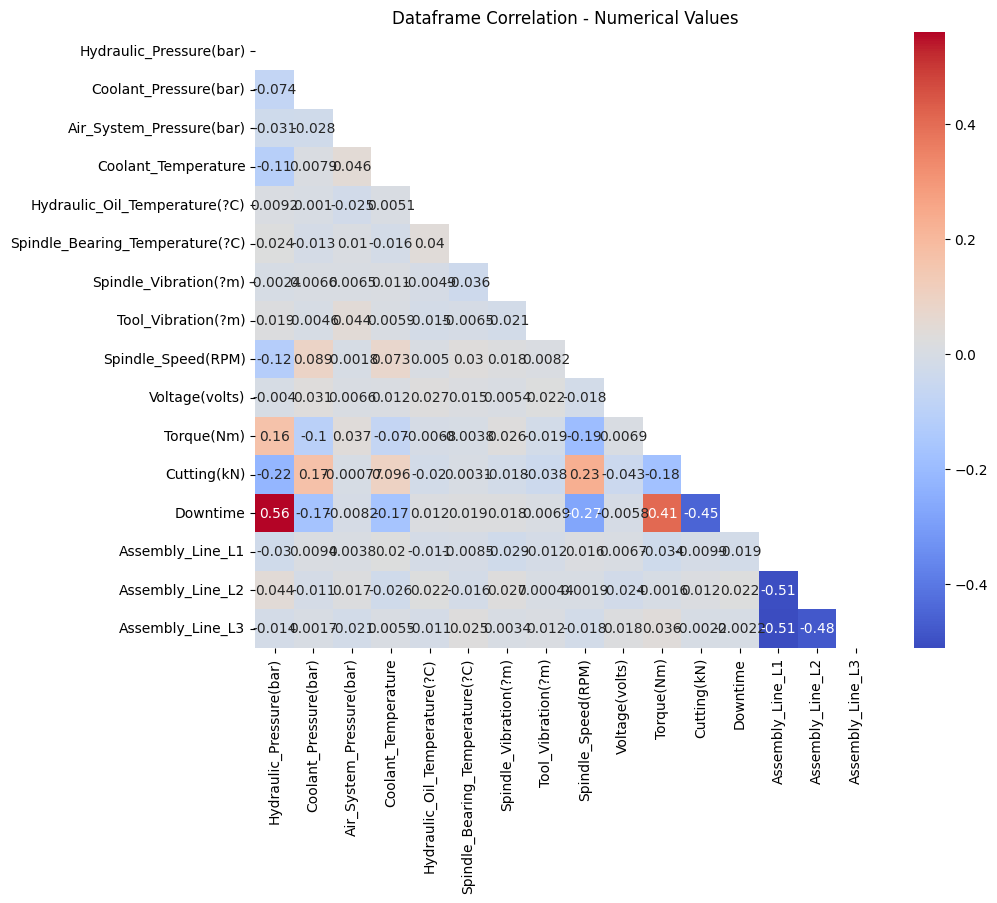

In [22]:
corr = df.select_dtypes(include='number').corr()
mask = np.triu(np.ones_like(corr, dtype=float))

plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm')
plt.title('Dataframe Correlation - Numerical Values')
plt.show()

##**2. Feature Selection**
---

In [23]:
input = df[[col for col in df.columns if col not in ['Date', 'Machine_ID', 'Downtime']]]
dep_var = df['Downtime']

###a. Recursive feature elimination with cross-validation (RFECV)

In [24]:
lr = LogisticRegression()
selector = RFECV(
    estimator=lr,
    step=1,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    #min_features_to_select=5,
    verbose=5,
)
selector.fit(input, dep_var)
print(selector.support_)

Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Fitting estimator with 10 features.
[ True  True  True  True False False False  True False False  True  True
 False  True  True]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [25]:
df_to_use = pd.DataFrame({
    'use': selector.support_
}, index = input.columns.tolist())
display(df_to_use)

columns_rfecv = df_to_use[df_to_use['use'] == True].index.tolist()

,use
Hydraulic_Pressure(bar),True
Coolant_Pressure(bar),True
Air_System_Pressure(bar),True
Coolant_Temperature,True
Hydraulic_Oil_Temperature(?C),False
Spindle_Bearing_Temperature(?C),False
Spindle_Vibration(?m),False
Tool_Vibration(?m),True
Spindle_Speed(RPM),False
Voltage(volts),False


###b. Select K-Best

In [26]:
selector = SelectKBest(score_func=chi2, k=4)
selector.fit(input, dep_var)

score_df = pd.DataFrame({
    'scores': selector.scores_
}, index=input.columns.tolist()).sort_values(by='scores', ascending=False)
score_df

,scores
Spindle_Speed(RPM),137818.274141
Hydraulic_Pressure(bar),7023.269620
Torque(Nm),611.831309
Coolant_Temperature,271.052617
Cutting(kN),68.863062
Coolant_Pressure(bar),14.644660
Assembly_Line_L2,0.795679
Assembly_Line_L1,0.595081
Voltage(volts),0.501418
Spindle_Bearing_Temperature(?C),0.360432


In [27]:
columns_skbest = score_df.index[0:4].tolist()

##**3. Data Splitting**
---

In [28]:
x = df[columns_rfecv]#columns_skbest]
y = df['Downtime']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [29]:
columns_skbest

['Spindle_Speed(RPM)',
 'Hydraulic_Pressure(bar)',
 'Torque(Nm)',
 'Coolant_Temperature']

In [30]:
columns_rfecv

['Hydraulic_Pressure(bar)',
 'Coolant_Pressure(bar)',
 'Air_System_Pressure(bar)',
 'Coolant_Temperature',
 'Tool_Vibration(?m)',
 'Torque(Nm)',
 'Cutting(kN)',
 'Assembly_Line_L2',
 'Assembly_Line_L3']

##**4. Data Scaling**
---

In [31]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

#**Data Modelling**
---

##**1. PCA - Principal Component Analysis**
---

In [32]:
scaler = StandardScaler()

x_pca = scaler.fit_transform(input)

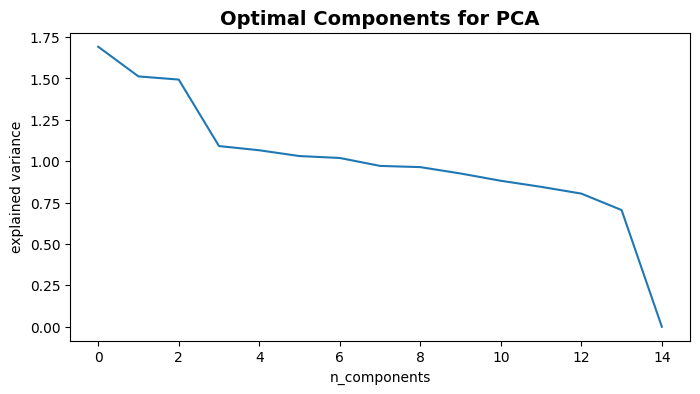

In [33]:
pca = PCA().fit(x_pca)
plt.figure(figsize=(8, 4))
plt.plot(pca.explained_variance_)
plt.title('Optimal Components for PCA', fontsize=14, fontweight='bold')
plt.xlabel('n_components')
plt.ylabel('explained variance')
plt.show()

/tmp/ipython-input-3768307382.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=x_cp[:, 0], y=x_cp[:, 1], c=y_cp, palette='viridis')
/tmp/ipython-input-3768307382.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


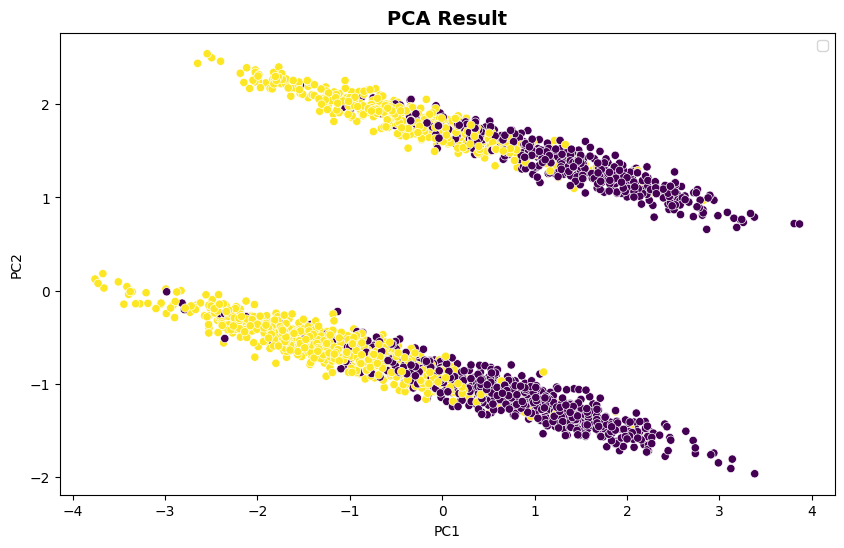

In [34]:
pca = PCA(n_components=2)

x_cp = x_pca.copy()
y_cp = y.copy()
x_cp = pca.fit_transform(x_cp)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_cp[:, 0], y=x_cp[:, 1], c=y_cp, palette='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Result', fontsize=14, fontweight='bold')
plt.legend()
plt.show()

In [35]:
pca.explained_variance_ratio_

array([0.11275425, 0.10079644])

##**2. Classification Model**
---

###a. Logistic Regression

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       381
           1       0.85      0.83      0.84       369

    accuracy                           0.85       750
   macro avg       0.85      0.85      0.85       750
weighted avg       0.85      0.85      0.85       750


Confusion Matrix:


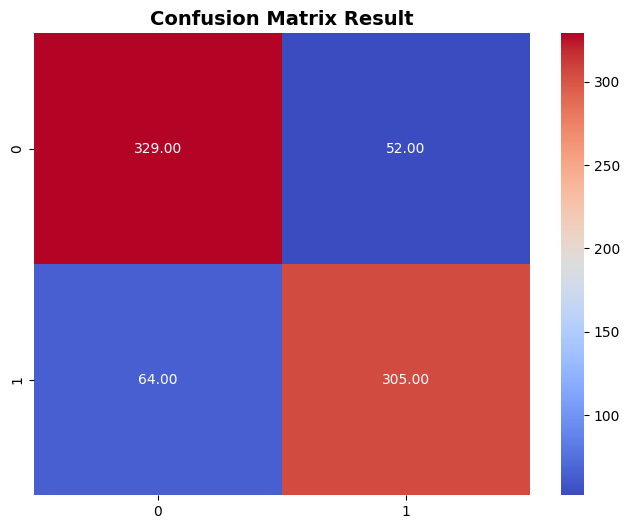

In [36]:
model = LogisticRegression(random_state=42, max_iter=5000)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')

cm = confusion_matrix(y_test, y_pred)
print(f'\nConfusion Matrix:')
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Confusion Matrix Result', fontsize=14, fontweight='bold')
plt.show()

###b. SVC - Support Vector Classifier

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       381
           1       0.80      0.85      0.82       369

    accuracy                           0.82       750
   macro avg       0.82      0.82      0.82       750
weighted avg       0.82      0.82      0.82       750


Confusion Matrix:


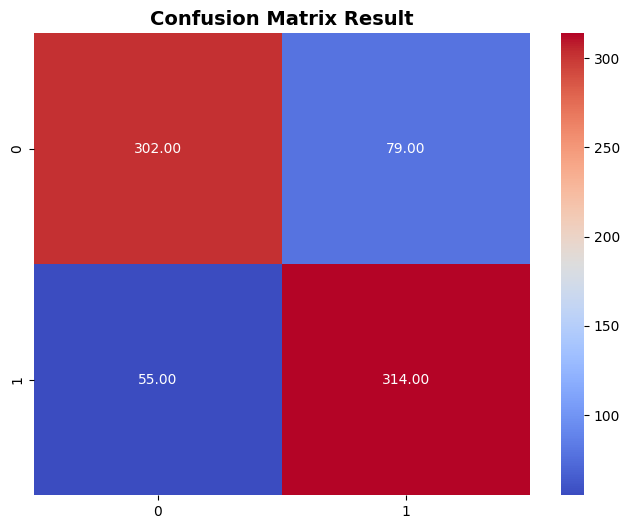

In [37]:
model = SVC(kernel='rbf', random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')

cm = confusion_matrix(y_test, y_pred)
print(f'\nConfusion Matrix:')
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Confusion Matrix Result', fontsize=14, fontweight='bold')
plt.show()

##**3. Data Clustering**
---

In [38]:
input_new = df[columns_skbest]

#scaler = StandardScaler()
#input_new = scaler.fit_transform(input_new)

In [39]:
n_clusters = range(2, 10)

sil_score, inertia = [], []
for cluster in n_clusters:
  kmeans = KMeans(n_clusters=cluster, random_state=42)
  kmeans.fit(input_new)
  label = kmeans.labels_

  inertia.append(kmeans.inertia_)
  sil_score.append(silhouette_score(input_new, label, metric='euclidean'))

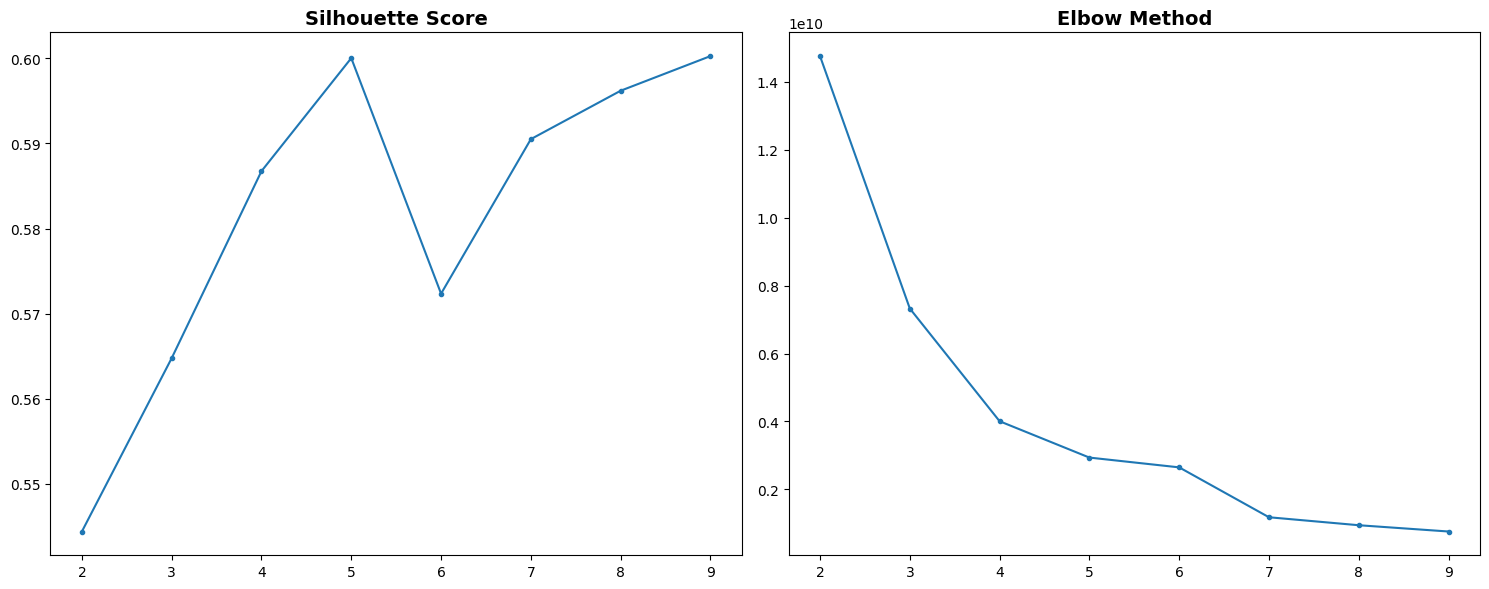

In [40]:
data_result = pd.DataFrame({
    'Silhouette Score': sil_score,
    'Elbow Method': inertia
}, index=n_clusters)

plt.figure(figsize=(15, 6))
for i, col in enumerate(data_result.columns):
  plt.subplot(1, 2, i+1)
  plt.plot(data_result.index.tolist(), data_result[col], marker='.')
  plt.title(col, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [41]:
input_new.columns

Index(['Spindle_Speed(RPM)', 'Hydraulic_Pressure(bar)', 'Torque(Nm)',
       'Coolant_Temperature'],
      dtype='object')

In [42]:
cols_new = columns_skbest.copy()
cols_new.append('Downtime')
input_new_w_downtime = df[cols_new]

In [43]:
kmeans = KMeans(n_clusters=5, random_state=42, max_iter=5000)
kmeans.fit(input_new)
label = kmeans.labels_

silhouette = silhouette_score(input_new, label, metric='euclidean')
print(f'Silhouette Score: {silhouette}')

df['cluster'] = kmeans.predict(input_new)
input_new['cluster'] = kmeans.predict(input_new)
cluster_data = df.groupby(by='cluster').agg({
    'Spindle_Speed(RPM)': 'mean',
    'Hydraulic_Pressure(bar)': 'mean',
    'Torque(Nm)': 'mean',
    'Coolant_Temperature': 'mean',
    'Downtime': 'mean'
})

display(df['cluster'].value_counts())
display(cluster_data)

Silhouette Score: 0.6000154072528902


/tmp/ipython-input-3912638513.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_new['cluster'] = kmeans.predict(input_new)


,count
cluster,
1,636
3,617
4,484
0,399
2,362


,Spindle_Speed(RPM),Hydraulic_Pressure(bar),Torque(Nm),Coolant_Temperature,Downtime
cluster,,,,,
0,14495.486216,109.716889,28.188110,17.583960,0.822055
1,20359.768995,102.960455,25.189754,18.325157,0.548742
2,26780.027624,86.951252,22.560009,19.491436,0.041436
3,18219.155592,97.686131,24.800532,18.352350,0.364668
4,22684.502066,108.278523,25.403985,19.350826,0.652893


##**4. Clustering Results**
---

###a. Numeric Data Across Clusters

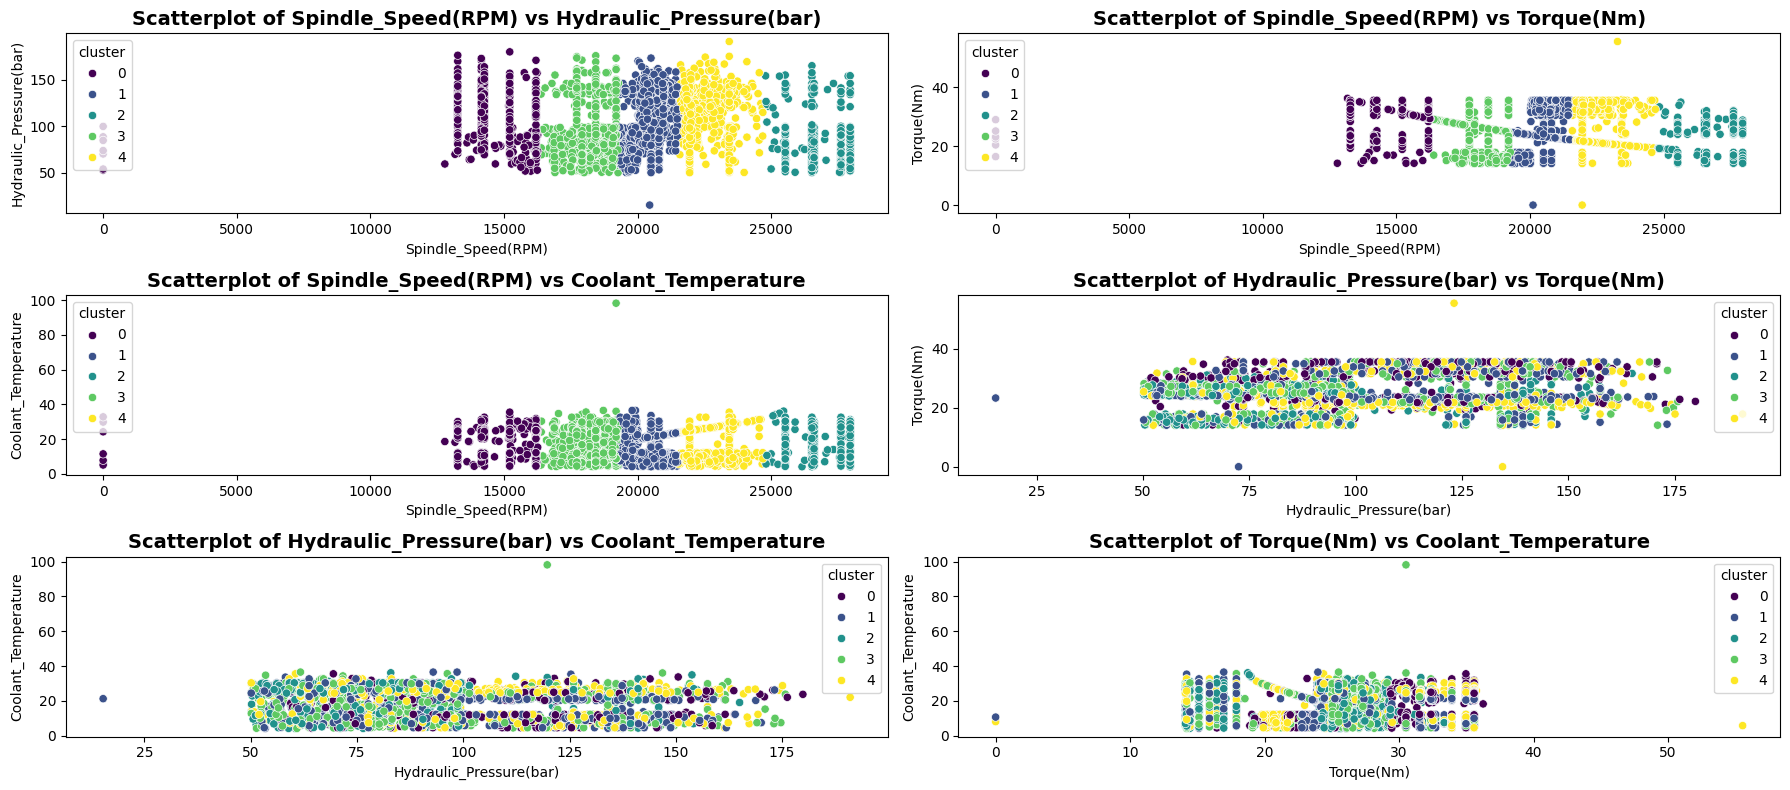

In [44]:
columns = [col for col in input_new.columns if col != 'cluster']
cols_used = ['cluster']
iter=0

plt.figure(figsize=(18, 8))
for col in columns:
  cols = [column for column in input_new.columns if column not in cols_used and column != col]
  for column in cols:
    plt.subplot(3, 2, iter+1)
    sns.scatterplot(x=input_new[col], y=input_new[column], hue=input_new['cluster'], palette='viridis')
    plt.title(f'Scatterplot of {col} vs {column}', fontsize=14, fontweight='bold')
    iter+=1
  cols_used.append(col)
plt.tight_layout()
plt.show()


###b. Categorical Data Across Clusters

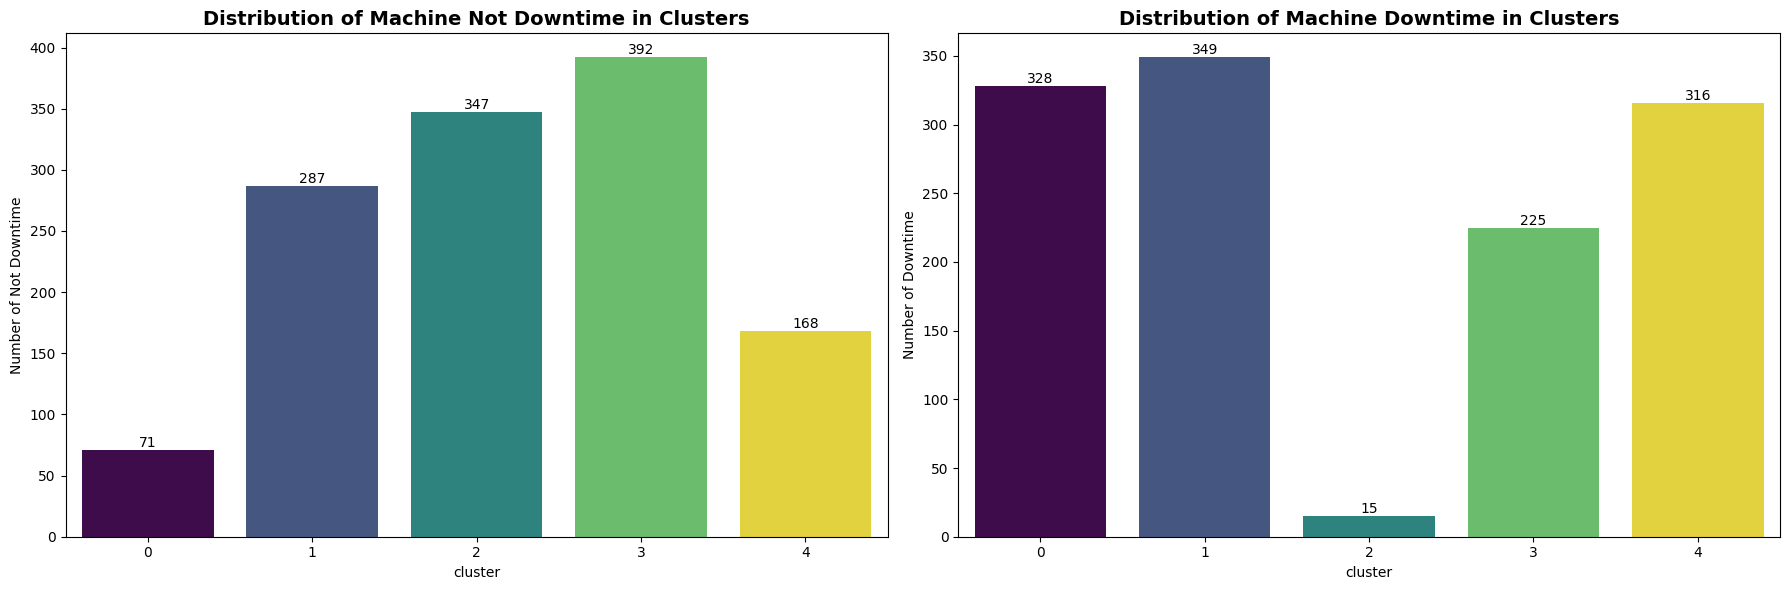

In [45]:
df_pvt = df.pivot_table(columns='Downtime', index='cluster', values='Date', aggfunc='count')

plt.figure(figsize=(18, 6))
for i, col in enumerate(df_pvt.columns):
  plt.subplot(1, 2, i+1)
  ax = sns.barplot(x=df_pvt.index, y=df_pvt[col], hue=df_pvt.index, palette='viridis', legend=False)
  for val in ax.containers:
    label=[v.get_height() for v in val]
    ax.bar_label(val, label=label, label_type='edge')
  down = 'Downtime' if col==1 else 'Not Downtime'
  plt.ylabel(f'Number of {down}')
  plt.title(f'Distribution of Machine {down} in Clusters', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

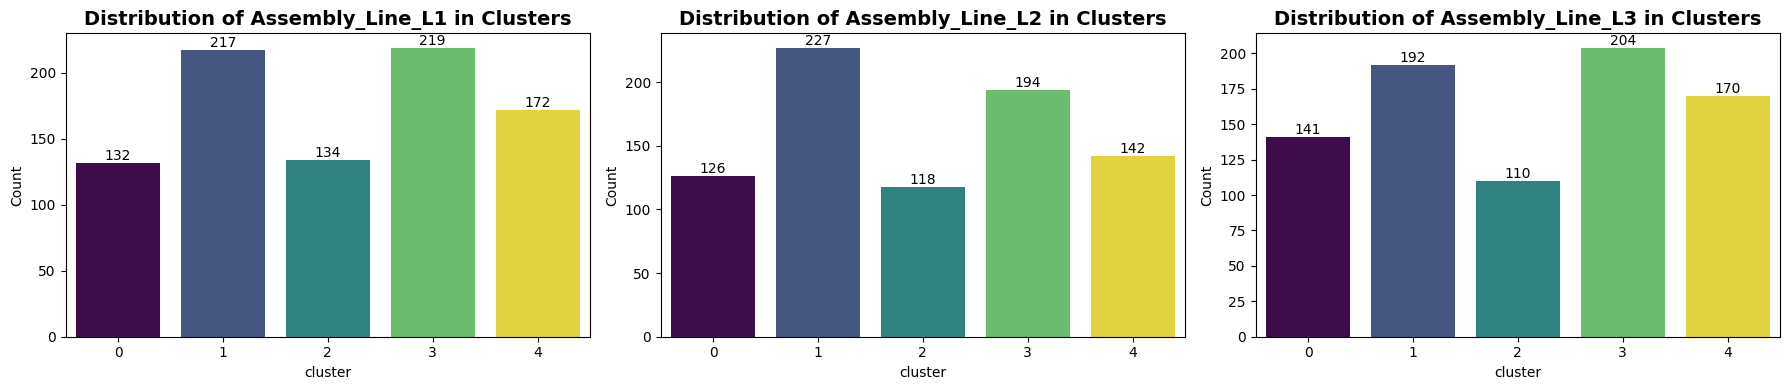

In [46]:
df_assembly_line = df.groupby(by='cluster').agg({
    'Assembly_Line_L1':'sum',
    'Assembly_Line_L2':'sum',
    'Assembly_Line_L3':'sum'
})

plt.figure(figsize=(18, 4))
for i, col in enumerate(df_assembly_line.columns):
  plt.subplot(1, 3, i+1)
  ax = sns.barplot(x=df_assembly_line.index, y=df_assembly_line[col], hue=df_assembly_line.index, palette='viridis', legend=False)
  for val in ax.containers:
    label=[v.get_height() for v in val]
    ax.bar_label(val, label=label, label_type='edge')
  plt.ylabel('Count')
  plt.title(f'Distribution of {col} in Clusters', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

#**Conclusion**
---
The classification model that was created is able to predict whether or not a machine would fail fairly reliably, with an accuracy of around 80%.

The results of this project shows that there are many factors that contributed to the failure of a machine, which is ascertained by the results of feature selection, which shows the significance of a feature with regards to it's impact on machine failure. Some of the top factors include:
1. **Hydraulic Pressure** - lower pressures tend to indicate and/or cause failure
2. **Torque** - lower torque may indicate/cause machine failure
3. **Coolant Temperature** - higher coolant temperatures tend to indicate and/or cause machine failure
4. **Spindle Speed** - higher spindle speeds tend to indicate and/or cause machine failure

At the same time, the number of failures peaked at around mid-April 2022, suggesting that at the time, the use of the machines peaked, causing less maintenance and increased wear, which would cause more failures.

Results of clustering on this project has yielded 5 clusters:
1. **Cluster 0**: This cluster is comprised of machines that operated **with a high downtime rate**, as shown by the particularly high numbers of downtime observations on this cluster. Machines of this cluster also tend to have **low spindle speeds, but high torque and hyrdaulic pressure**. This suggests that these machines are ***not reliable, likely due to design flaws or long-term use***.
2. **Cluster 1**: This cluster has a **relatively high downtime rate**, as shown by the fact that the number of downtime is higher than non-downtime in this cluster. Machines of this cluster has **a medium spindle speed, high hydraulic pressure, and high torque**. As such, machines of this cluster has ***mediocre performance, but not particularly reliable***.
3. **Cluster 2**: This cluster has the **lowest downtime rate**, as shown by the low number of downtimes. Machines of this cluster has **high spindle speeds, hyrdaulic pressure, and torque**. This suggests that machines of this cluster are ***the most reliable and high performance machines***.
4. **Cluster 3**: This cluster has a **fairly low, yet not insignificant downtime rate**, with a **high hydraulic pressure and coolant temperature, but low spindle speed**. Machines of this cluster are ***relatively reliable, but has a mediocre performance***.
5. **Cluster 4**: This cluster is comprised of machines that **has a high downtime rate**, as shown by the high numbers downtime observations. Machines of this cluster **has high torque, hydraulic pressures, and relatively high spindle speed**. This suggests that these ***machines are high-performance, likely well-used machines with a relatively high downtime rate***.

As such, based on the results of this clustering algorithm, the machines that are usable for a long period of time could be found in Cluster 2, and as such should be kept and maintained. Operable machines could be found on Cluster 3, though these machines do not have a high performance. Machines of Cluster 0, 1, and 4 doesn't have high performance, with all of them needing repairs and maintenance. Machines in Cluster 4 are the most urgent, since it has fairly high performance.

In [47]:
df_failures_agg = df.groupby(by='Downtime').agg({
    'Hydraulic_Pressure(bar)': 'mean',
    'Coolant_Pressure(bar)': 'mean',
    'Air_System_Pressure(bar)': 'mean',
    'Coolant_Temperature': 'mean',
    'Hydraulic_Oil_Temperature(?C)': 'mean',
    'Spindle_Bearing_Temperature(?C)': 'mean',
    'Spindle_Vibration(?m)': 'mean',
    'Tool_Vibration(?m)': 'mean',
    'Spindle_Speed(RPM)': 'mean',
    'Voltage(volts)': 'mean',
    'Torque(Nm)': 'mean',
    'Cutting(kN)': 'mean',
})
df_failures_agg

,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(?C),Spindle_Bearing_Temperature(?C),Spindle_Vibration(?m),Tool_Vibration(?m),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN)
Downtime,,,,,,,,,,,,
0,84.773690,5.11490,6.502959,19.983083,47.571526,34.991481,1.003715,25.374725,21319.361265,349.258498,22.778585,3.055980
1,118.553668,4.77428,6.496340,17.142985,47.661863,35.133746,1.015794,25.463595,19203.899498,348.729102,27.751022,2.502014


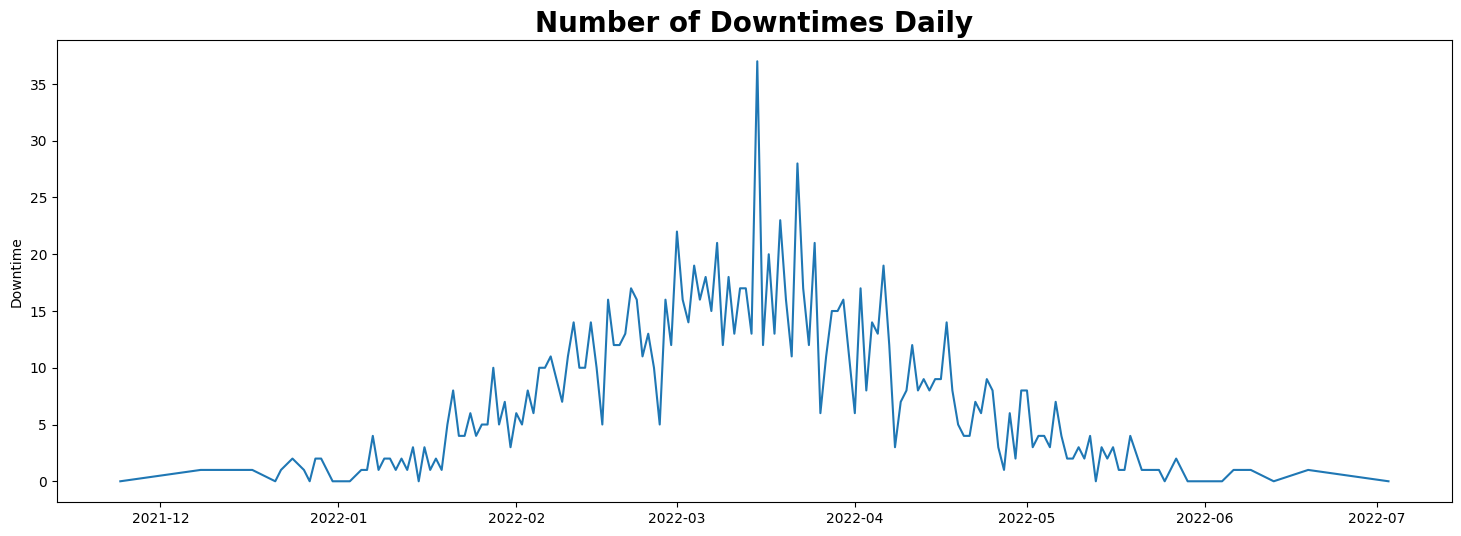

In [48]:
df_daily = df.groupby(by='Date').agg({
    'Downtime': 'sum'
})

plt.figure(figsize=(18,6))
sns.lineplot(x=df_daily.index.tolist(), y=df_daily['Downtime'], markers='o')
plt.title('Number of Downtimes Daily', fontsize=20, fontweight='bold')
plt.show()